<a href="https://colab.research.google.com/github/AnjanaAbY/Supply-Chain-Management/blob/main/Supply_Chain_Management.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Data Exploration and Preprocessing**

In [187]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from scipy.stats import skew

In [188]:
#Load the training dataset
train_data = pd.read_csv("/content/drive/MyDrive/supply_train.csv",index_col=0)
print(train_data)

      Ware_house_ID WH_Manager_ID Location_type WH_capacity_size   zone  \
0         WH_100000     EID_50000         Urban            Small   West   
1         WH_100001     EID_50001         Rural            Large  North   
2         WH_100002     EID_50002         Rural              Mid  South   
3         WH_100003     EID_50003         Rural              Mid  North   
4         WH_100004     EID_50004         Rural            Large  North   
...             ...           ...           ...              ...    ...   
16615     WH_116615     EID_66615         Urban            Large   West   
16616     WH_116616     EID_66616         Urban            Large  North   
16617     WH_116617     EID_66617         Rural            Large  North   
16618     WH_116618     EID_66618         Rural            Small   West   
16619     WH_116619     EID_66619         Rural            Large   West   

      WH_regional_zone  num_refill_req_l3m  transport_issue_l1y  \
0               Zone 6          

In [190]:
#Load the testing dataset
test_data = pd.read_csv("/content/drive/MyDrive/supply_test.csv",index_col=0)
print(test_data)

      Ware_house_ID WH_Manager_ID Location_type WH_capacity_size   zone  \
16621     WH_116621     EID_66621         Rural            Large  North   
16622     WH_116622     EID_66622         Rural            Large  North   
16623     WH_116623     EID_66623         Rural            Small  North   
16624     WH_116624     EID_66624         Rural              Mid   West   
16625     WH_116625     EID_66625         Urban              Mid  North   
...             ...           ...           ...              ...    ...   
22145     WH_122145     EID_72145         Rural            Large  North   
22146     WH_122146     EID_72146         Rural            Small  South   
22147     WH_122147     EID_72147         Rural            Large  North   
22148     WH_122148     EID_72148         Rural            Large  North   
22149     WH_122149     EID_72149         Rural              Mid   East   

      WH_regional_zone  num_refill_req_l3m  transport_issue_l1y  \
16621           Zone 5          

In [191]:
# Display the first few rows of the training dataset
print("Head of the training dataset:")
print(train_data.head())

Head of the training dataset:
  Ware_house_ID WH_Manager_ID Location_type WH_capacity_size   zone  \
0     WH_100000     EID_50000         Urban            Small   West   
1     WH_100001     EID_50001         Rural            Large  North   
2     WH_100002     EID_50002         Rural              Mid  South   
3     WH_100003     EID_50003         Rural              Mid  North   
4     WH_100004     EID_50004         Rural            Large  North   

  WH_regional_zone  num_refill_req_l3m  transport_issue_l1y  \
0           Zone 6                   3                    1   
1           Zone 5                   0                    0   
2           Zone 2                   1                    0   
3           Zone 3                   7                    4   
4           Zone 5                   3                    1   

   Competitor_in_mkt  retail_shop_num  ... electric_supply  dist_from_hub  \
0                  2             4651  ...               1             91   
1         

In [192]:
# Display the first few rows of the testing dataset
print("Head of the testing dataset:")
print(test_data.head())

Head of the testing dataset:
      Ware_house_ID WH_Manager_ID Location_type WH_capacity_size   zone  \
16621     WH_116621     EID_66621         Rural            Large  North   
16622     WH_116622     EID_66622         Rural            Large  North   
16623     WH_116623     EID_66623         Rural            Small  North   
16624     WH_116624     EID_66624         Rural              Mid   West   
16625     WH_116625     EID_66625         Urban              Mid  North   

      WH_regional_zone  num_refill_req_l3m  transport_issue_l1y  \
16621           Zone 5                   5                    0   
16622           Zone 5                   5                    0   
16623           Zone 6                   3                    0   
16624           Zone 4                   5                    2   
16625           Zone 4                   6                    0   

       Competitor_in_mkt  retail_shop_num  ... electric_supply  dist_from_hub  \
16621                  3            

##**Data Analysis**

In [193]:
# Display data types and missing values of training data
print("\nData Types and Missing Values of training data:")
print(train_data.info())


Data Types and Missing Values of training data:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 16620 entries, 0 to 16619
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ware_house_ID                 16620 non-null  object 
 1   WH_Manager_ID                 16620 non-null  object 
 2   Location_type                 16620 non-null  object 
 3   WH_capacity_size              16620 non-null  object 
 4   zone                          16620 non-null  object 
 5   WH_regional_zone              16620 non-null  object 
 6   num_refill_req_l3m            16620 non-null  int64  
 7   transport_issue_l1y           16620 non-null  int64  
 8   Competitor_in_mkt             16620 non-null  int64  
 9   retail_shop_num               16620 non-null  int64  
 10  wh_owner_type                 16620 non-null  object 
 11  distributor_num               16620 non-null  int64  
 12  flood_impac

In [194]:
# Display data types and missing values of testing data
print("\nData Types and Missing Values of testing data:")
print(test_data.info())


Data Types and Missing Values of testing data:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 5529 entries, 16621 to 22149
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ware_house_ID                 5529 non-null   object 
 1   WH_Manager_ID                 5529 non-null   object 
 2   Location_type                 5529 non-null   object 
 3   WH_capacity_size              5529 non-null   object 
 4   zone                          5529 non-null   object 
 5   WH_regional_zone              5529 non-null   object 
 6   num_refill_req_l3m            5529 non-null   int64  
 7   transport_issue_l1y           5529 non-null   int64  
 8   Competitor_in_mkt             5529 non-null   int64  
 9   retail_shop_num               5529 non-null   int64  
 10  wh_owner_type                 5529 non-null   object 
 11  distributor_num               5529 non-null   int64  
 12  flood_imp

In [195]:
#Summary statistics of train data
print(train_data.describe().T)

                              count          mean           std     min  \
num_refill_req_l3m          16620.0      4.126655      2.606241     0.0   
transport_issue_l1y         16620.0      0.780927      1.206351     0.0   
Competitor_in_mkt           16620.0      3.103129      1.147711     0.0   
retail_shop_num             16620.0   4983.904994   1051.032239  1821.0   
distributor_num             16620.0     42.473706     16.090000    15.0   
flood_impacted              16620.0      0.096871      0.295791     0.0   
flood_proof                 16620.0      0.056017      0.229961     0.0   
electric_supply             16620.0      0.655716      0.475149     0.0   
dist_from_hub               16620.0    163.521901     62.701193    55.0   
workers_num                 15953.0     28.911490      7.842046    10.0   
wh_est_year                  8760.0   2009.345320      7.544672  1996.0   
storage_issue_reported_l3m  16620.0     17.127196      9.163901     0.0   
temp_reg_mach            

In [196]:
#Summary statistics of test data
print(test_data.describe().T)

                             count          mean           std     min  \
num_refill_req_l3m          5529.0      4.007235      2.604325     0.0   
transport_issue_l1y         5529.0      0.765600      1.187567     0.0   
Competitor_in_mkt           5529.0      3.106167      1.128396     1.0   
retail_shop_num             5529.0   4980.695424   1049.617325  1953.0   
distributor_num             5529.0     42.128052     15.959934    15.0   
flood_impacted              5529.0      0.104178      0.305519     0.0   
flood_proof                 5529.0      0.049919      0.217797     0.0   
electric_supply             5529.0      0.657262      0.474668     0.0   
dist_from_hub               5529.0    163.899982     62.544704    55.0   
workers_num                 5319.0     29.010528      7.848478    10.0   
wh_est_year                 2844.0   2009.572785      7.473201  1996.0   
storage_issue_reported_l3m  5529.0     17.085549      9.206551     0.0   
temp_reg_mach               5529.0    

In [197]:
#dimension(Shape) of training data
print("Shape of training data:",train_data.shape)
#dimension(Shape) of testing data
print("shape of testing data:",test_data.shape)

Shape of training data: (16620, 24)
shape of testing data: (5529, 24)


##**Duplicate Rows and Correlation Analysis**

In [198]:
#identify and count the duplicate columns in training dataset
duplicate_columns = train_data.columns.duplicated()
print("Number of duplicate rows in train data:", duplicate_columns.sum())

#identify and count the duplicate columns in testing dataset
duplicate_columns = test_data.columns.duplicated()
print("Number of duplicate rows in test data:", duplicate_columns.sum())

Number of duplicate rows in train data: 0
Number of duplicate rows in test data: 0


In [199]:
# Check for highly correlated columns in train data
correlation_matrix = train_data.corr().abs()
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
highly_correlated_columns = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.9)]
print("Highly Correlated Columns in train data:", highly_correlated_columns)

# Check for highly correlated columns in test data
correlation_matrix = train_data.corr().abs()
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
highly_correlated_columns = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.9)]
print("Highly Correlated Columns in test data:", highly_correlated_columns)

Highly Correlated Columns in train data: ['product_wg_ton']
Highly Correlated Columns in test data: ['product_wg_ton']


<ipython-input-199-9fe53ef1ad28>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = train_data.corr().abs()
<ipython-input-199-9fe53ef1ad28>:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = train_data.corr().abs()


In [200]:
unwanted_variables=['Ware_house_ID','WH_Manager_ID']
#Removal of unwanted variables from train data
train_data=train_data.drop(unwanted_variables,axis=1)
#Removal of unwanted variables from test data
test_data=test_data.drop(unwanted_variables,axis=1)

##**Univariate, Bivariate and Multivariate Analysis**

In [201]:
#categorical and continuous attributes based on the train data
categorical_attributes = ['Location_type', 'WH_capacity_size', 'zone', 'WH_regional_zone','wh_owner_type', 'approved_wh_govt_certificate']

continuous_attributes = ['num_refill_req_l3m', 'transport_issue_l1y', 'Competitor_in_mkt', 'retail_shop_num','distributor_num', 'flood_impacted', 'flood_proof', 'electric_supply',
                         'dist_from_hub','workers_num', 'wh_est_year', 'storage_issue_reported_l3m', 'temp_reg_mach', 'wh_breakdown_l3m','product_wg_ton']

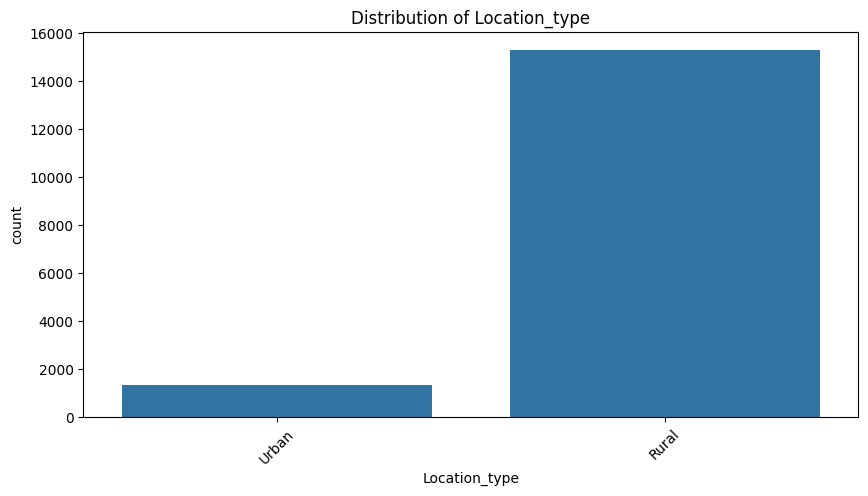

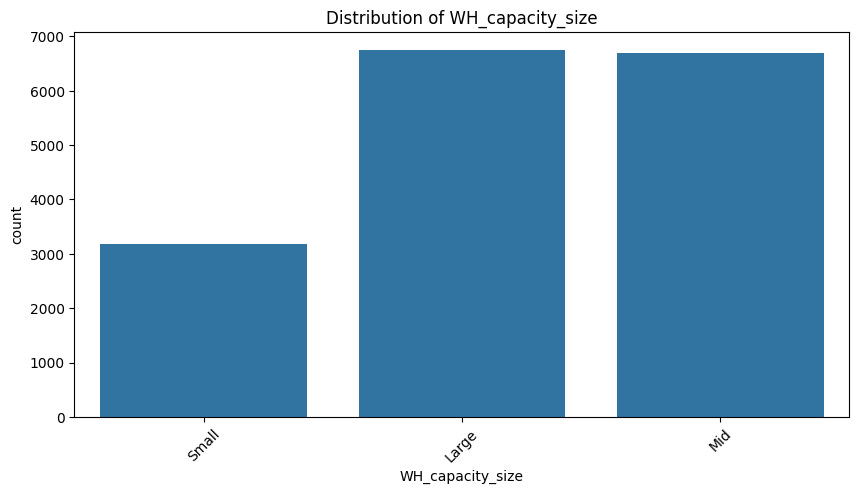

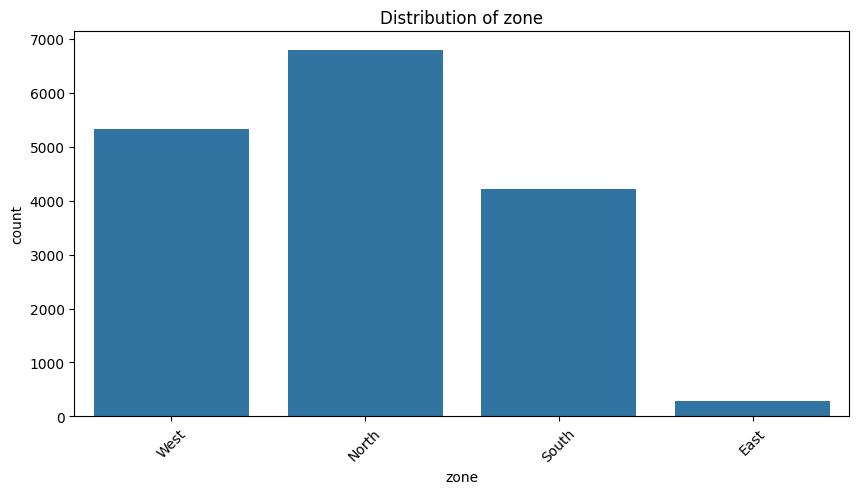

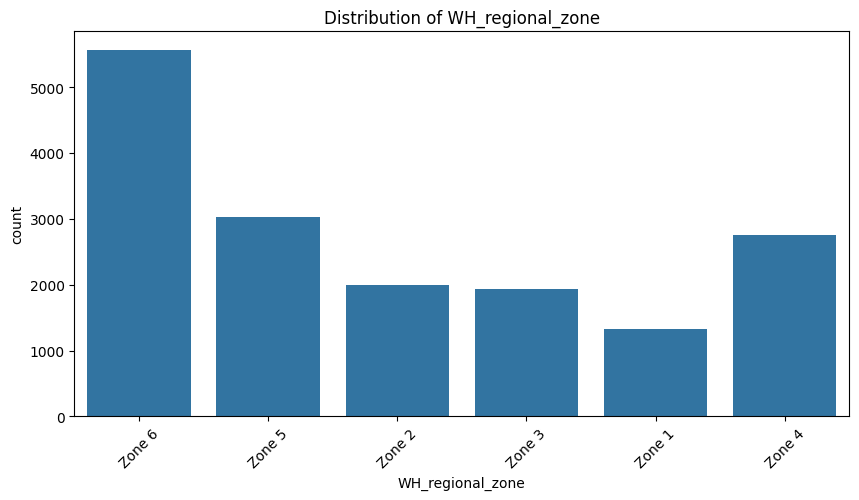

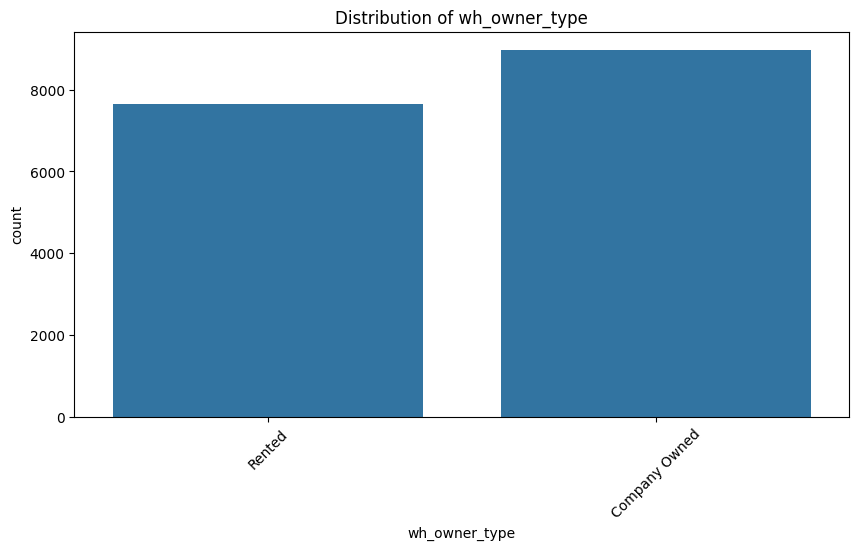

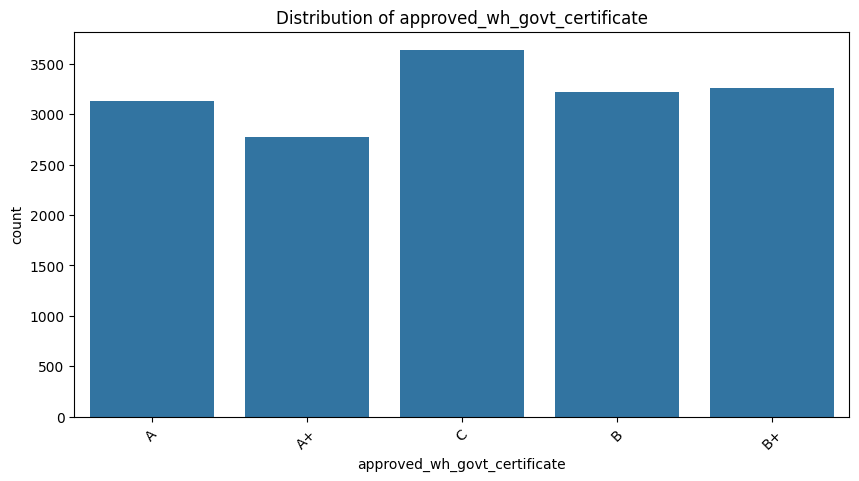

In [202]:
# Univariate Analysis for Categorical Attributes in train data
for attribute in categorical_attributes:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=attribute, data=train_data)
    plt.title(f'Distribution of {attribute}')
    plt.xticks(rotation=45)
    plt.show()


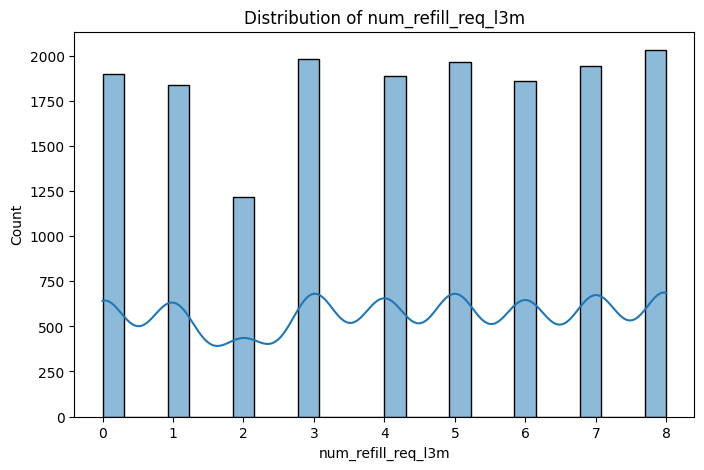

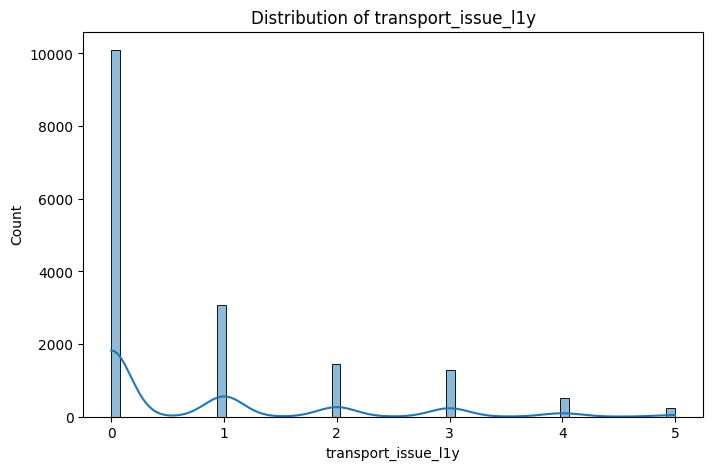

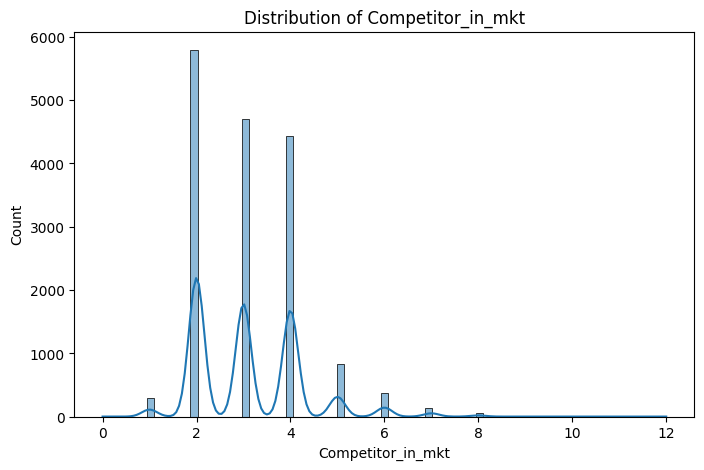

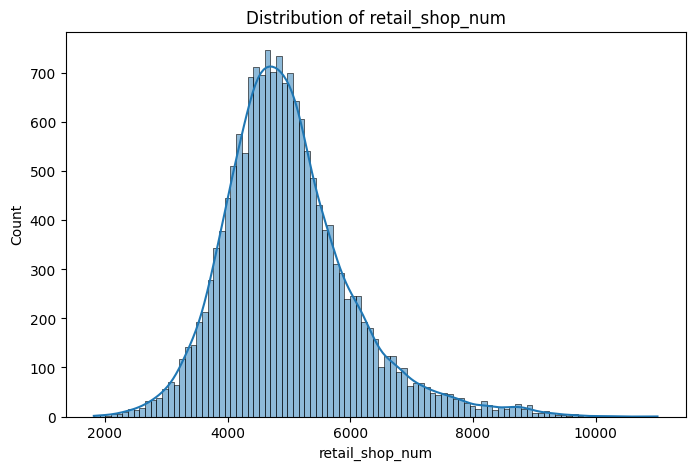

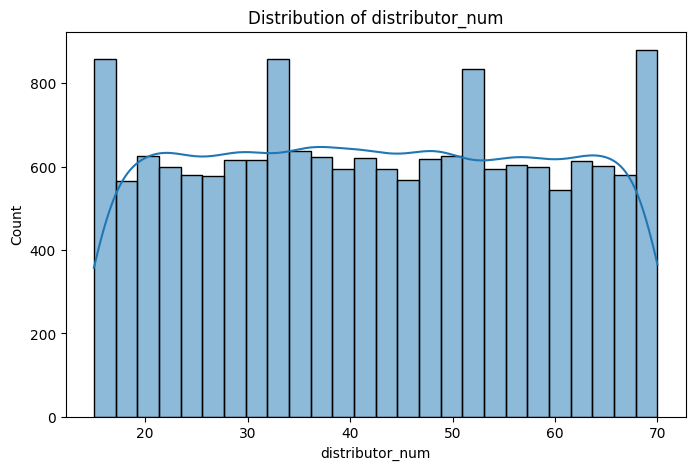

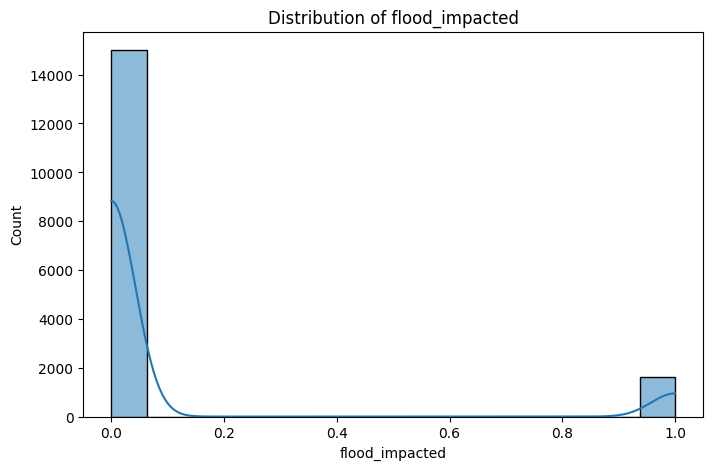

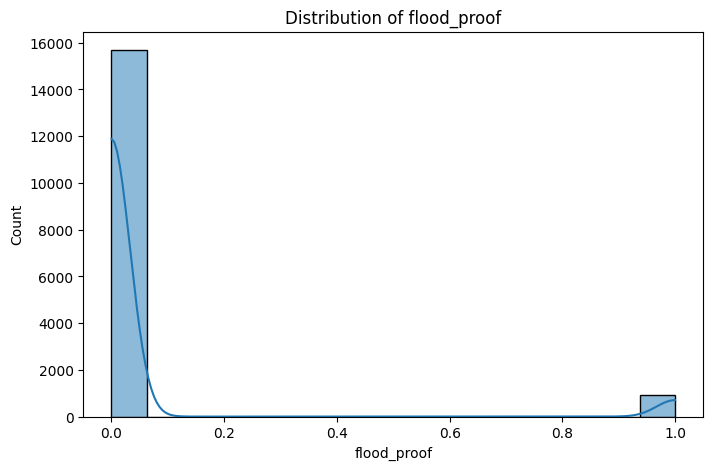

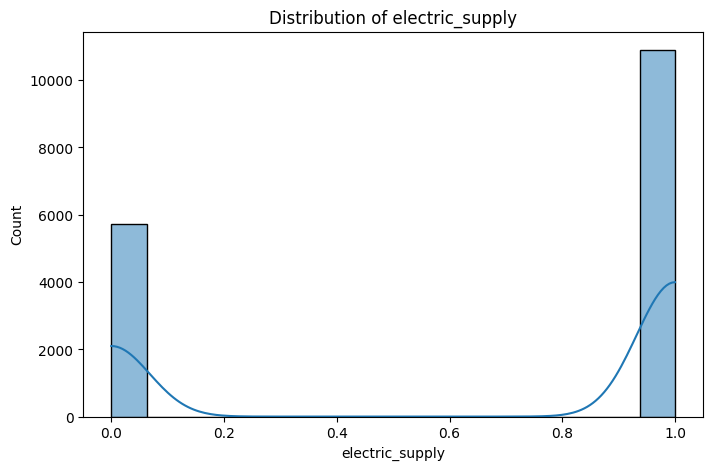

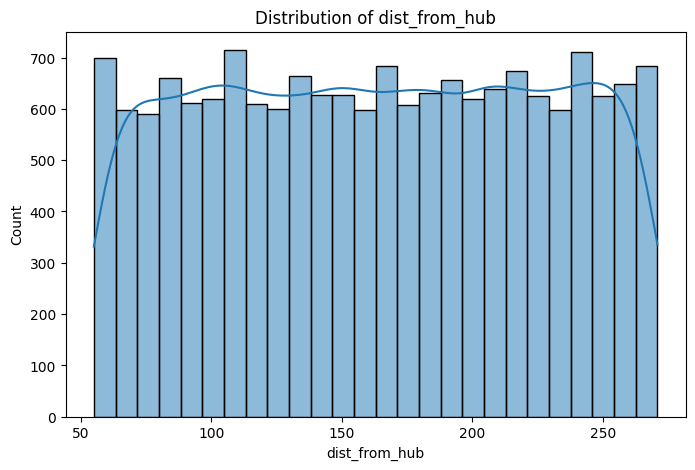

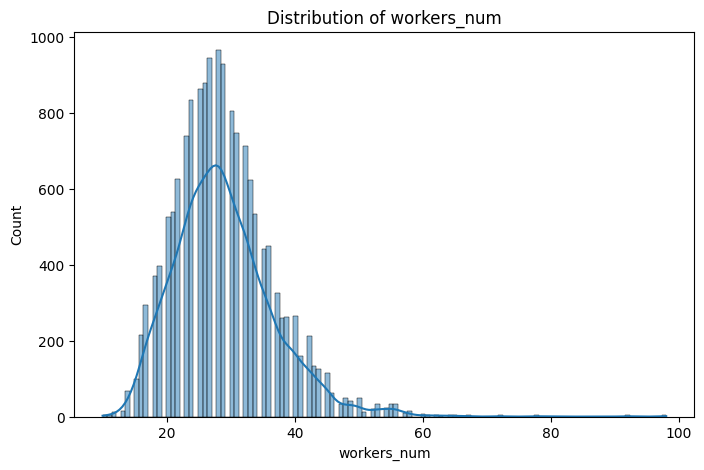

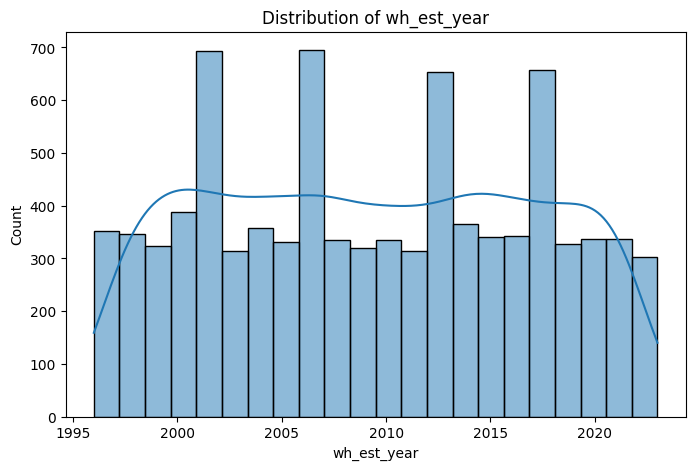

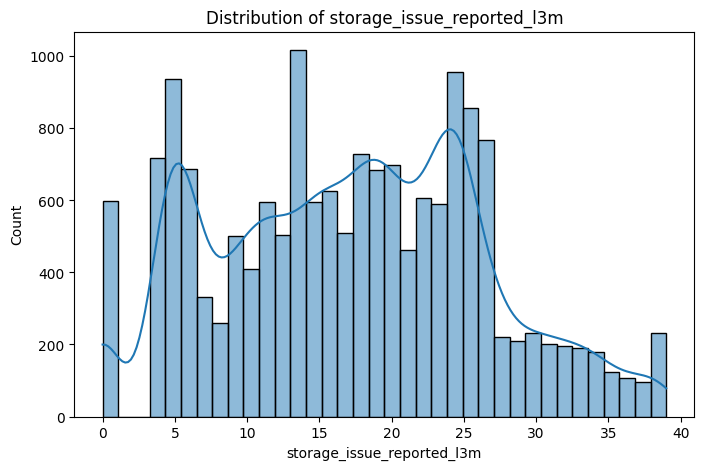

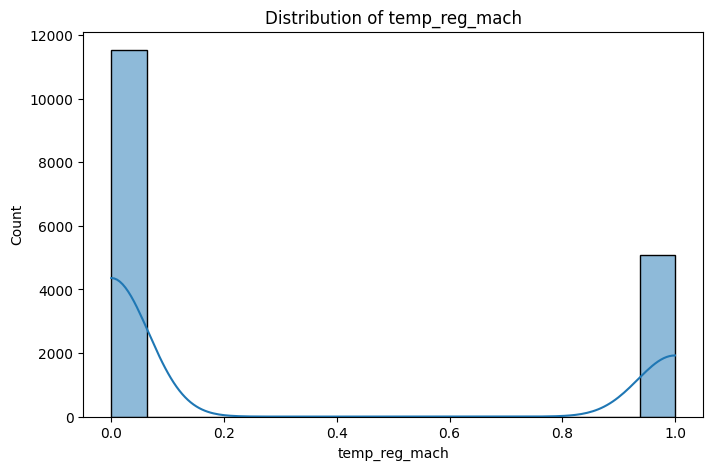

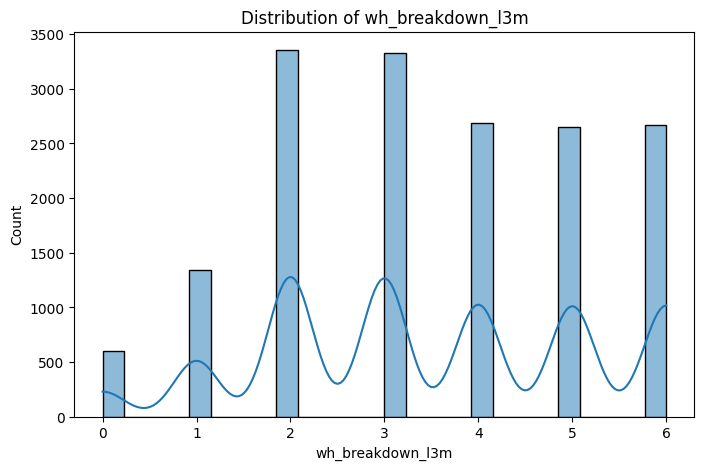

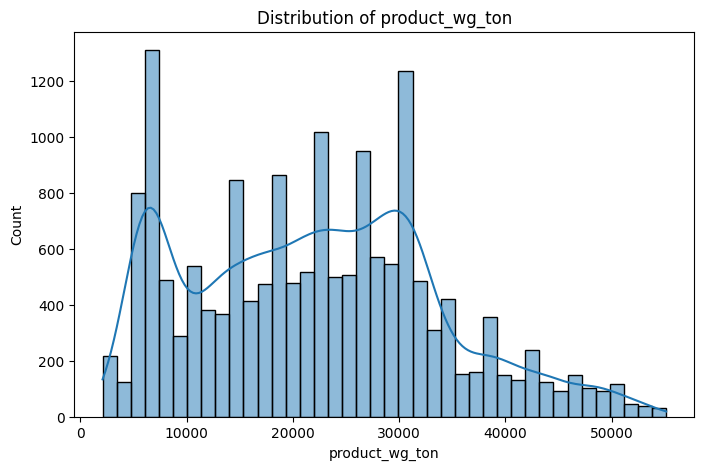

In [203]:
# Univariate Analysis for Continuous Attributes in train data
for attribute in continuous_attributes:
    plt.figure(figsize=(8, 5))
    sns.histplot(train_data[attribute], kde=True)
    plt.title(f'Distribution of {attribute}')
    plt.show()

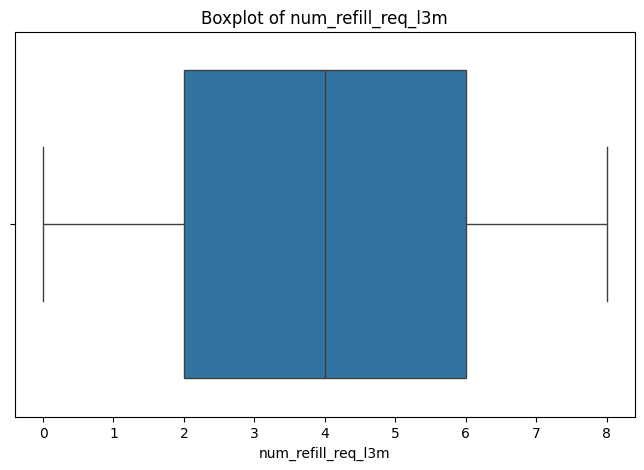

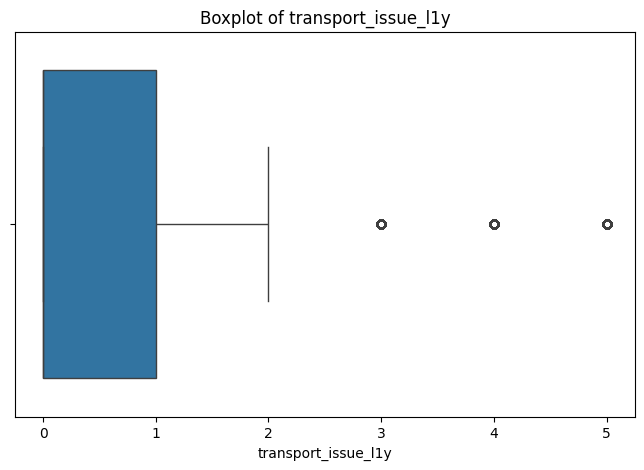

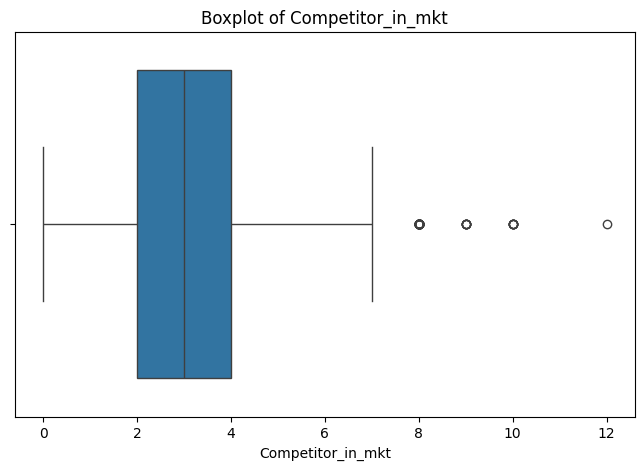

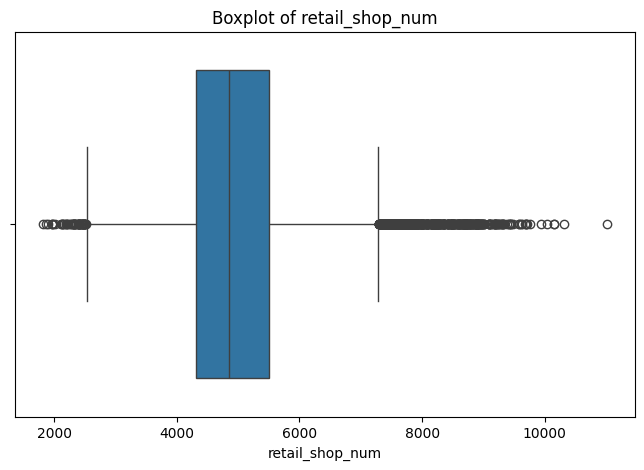

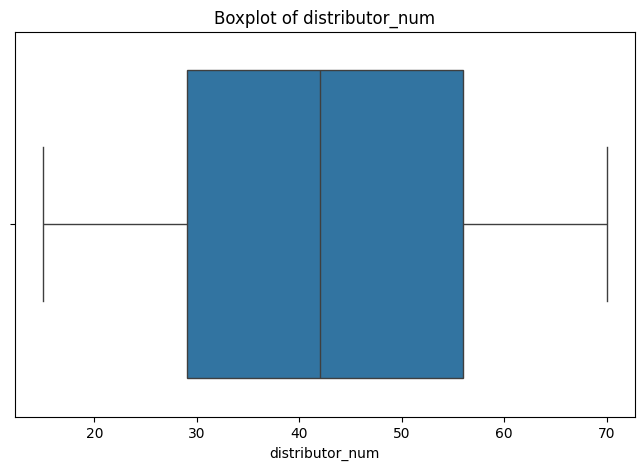

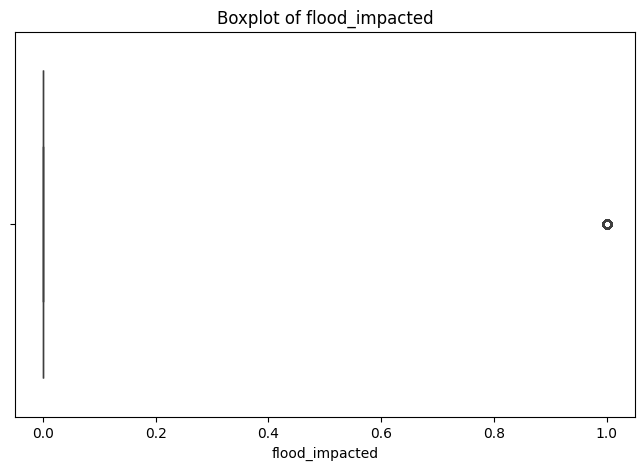

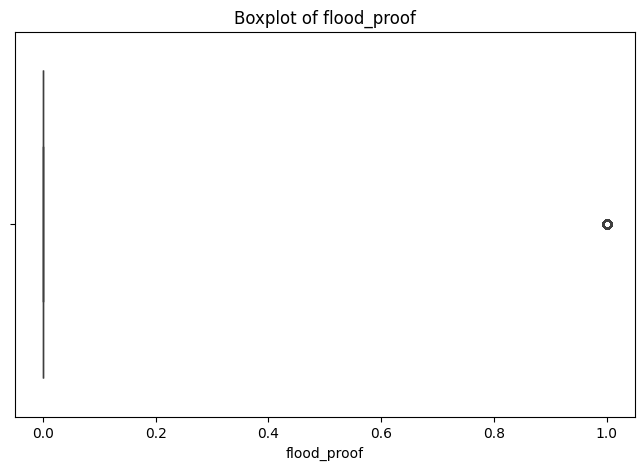

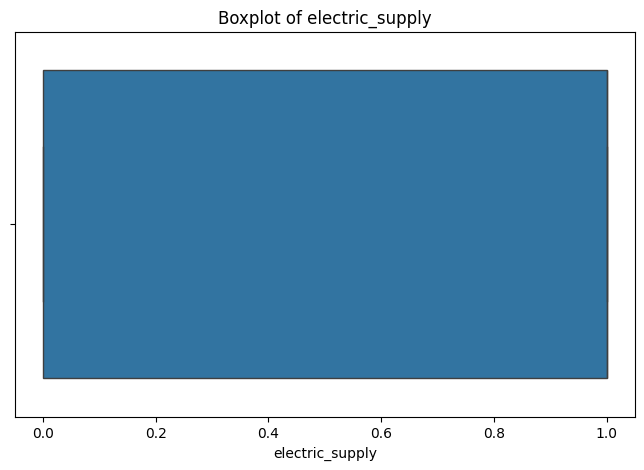

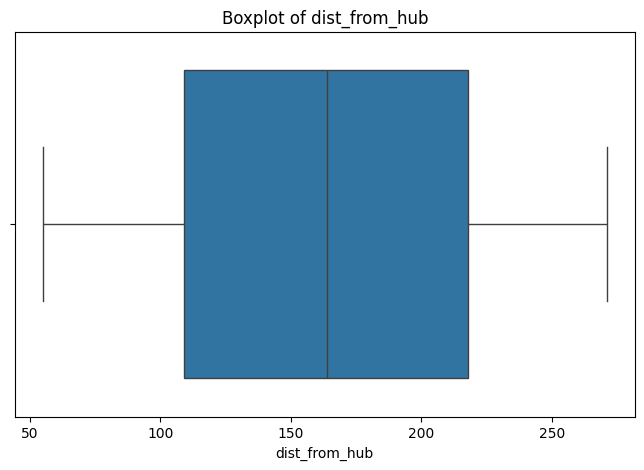

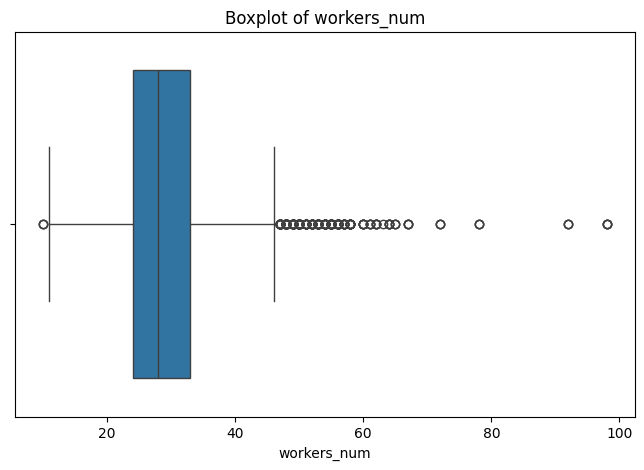

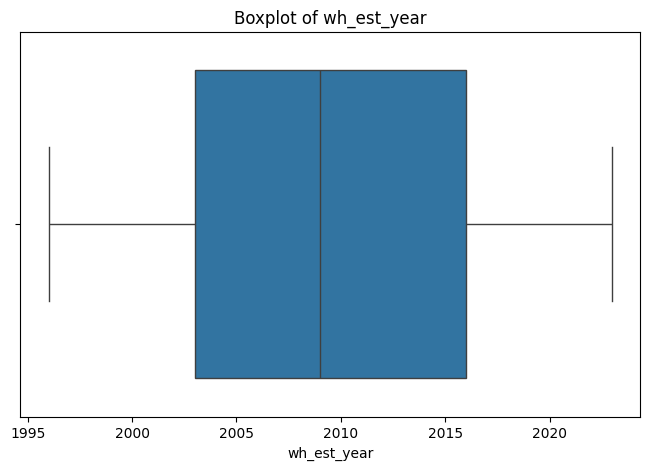

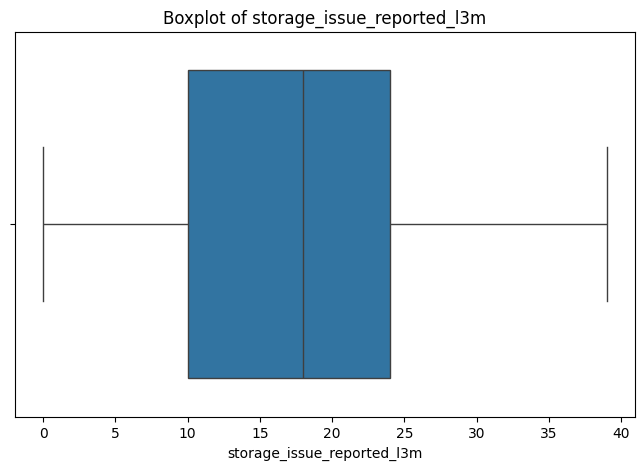

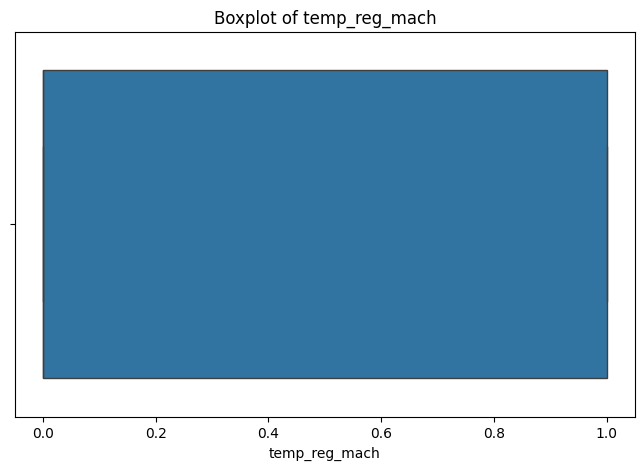

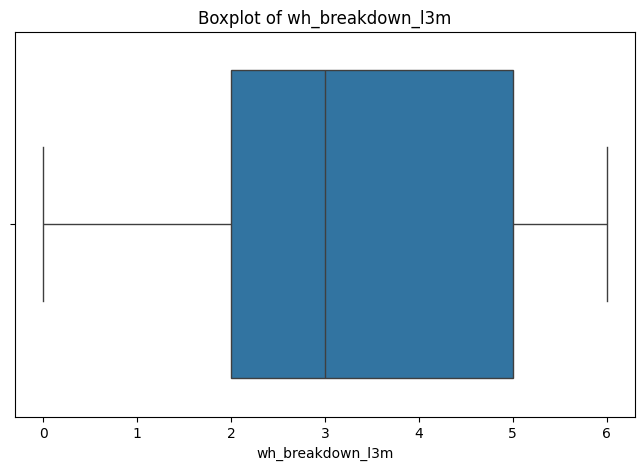

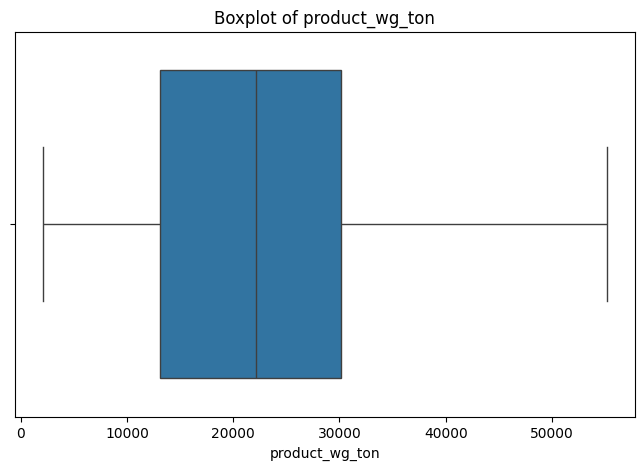

In [204]:
# Univariate Analysis for Continuous Attributes using Boxplots in train data
for attribute in continuous_attributes:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=train_data[attribute])
    plt.title(f'Boxplot of {attribute}')
    plt.show()


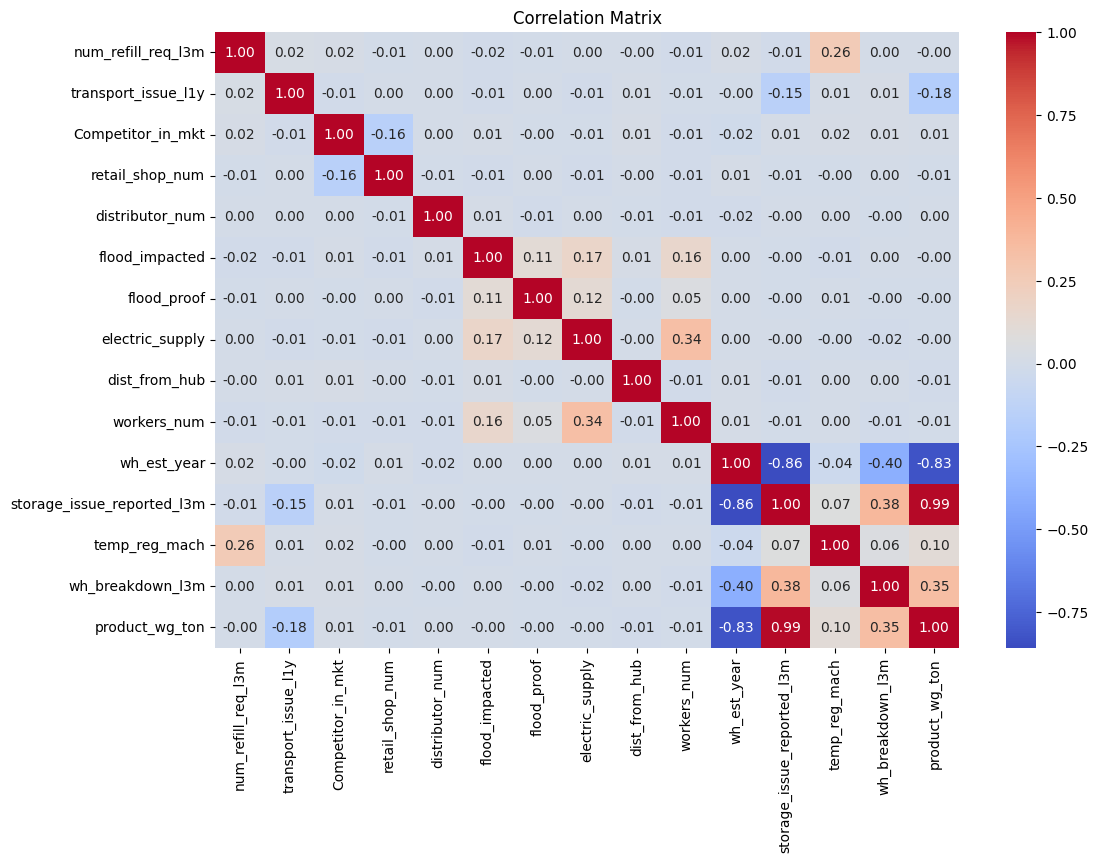

In [205]:
# Bivariate Analysis
# Relationship between different variables in train data
correlation_matrix = train_data[continuous_attributes].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


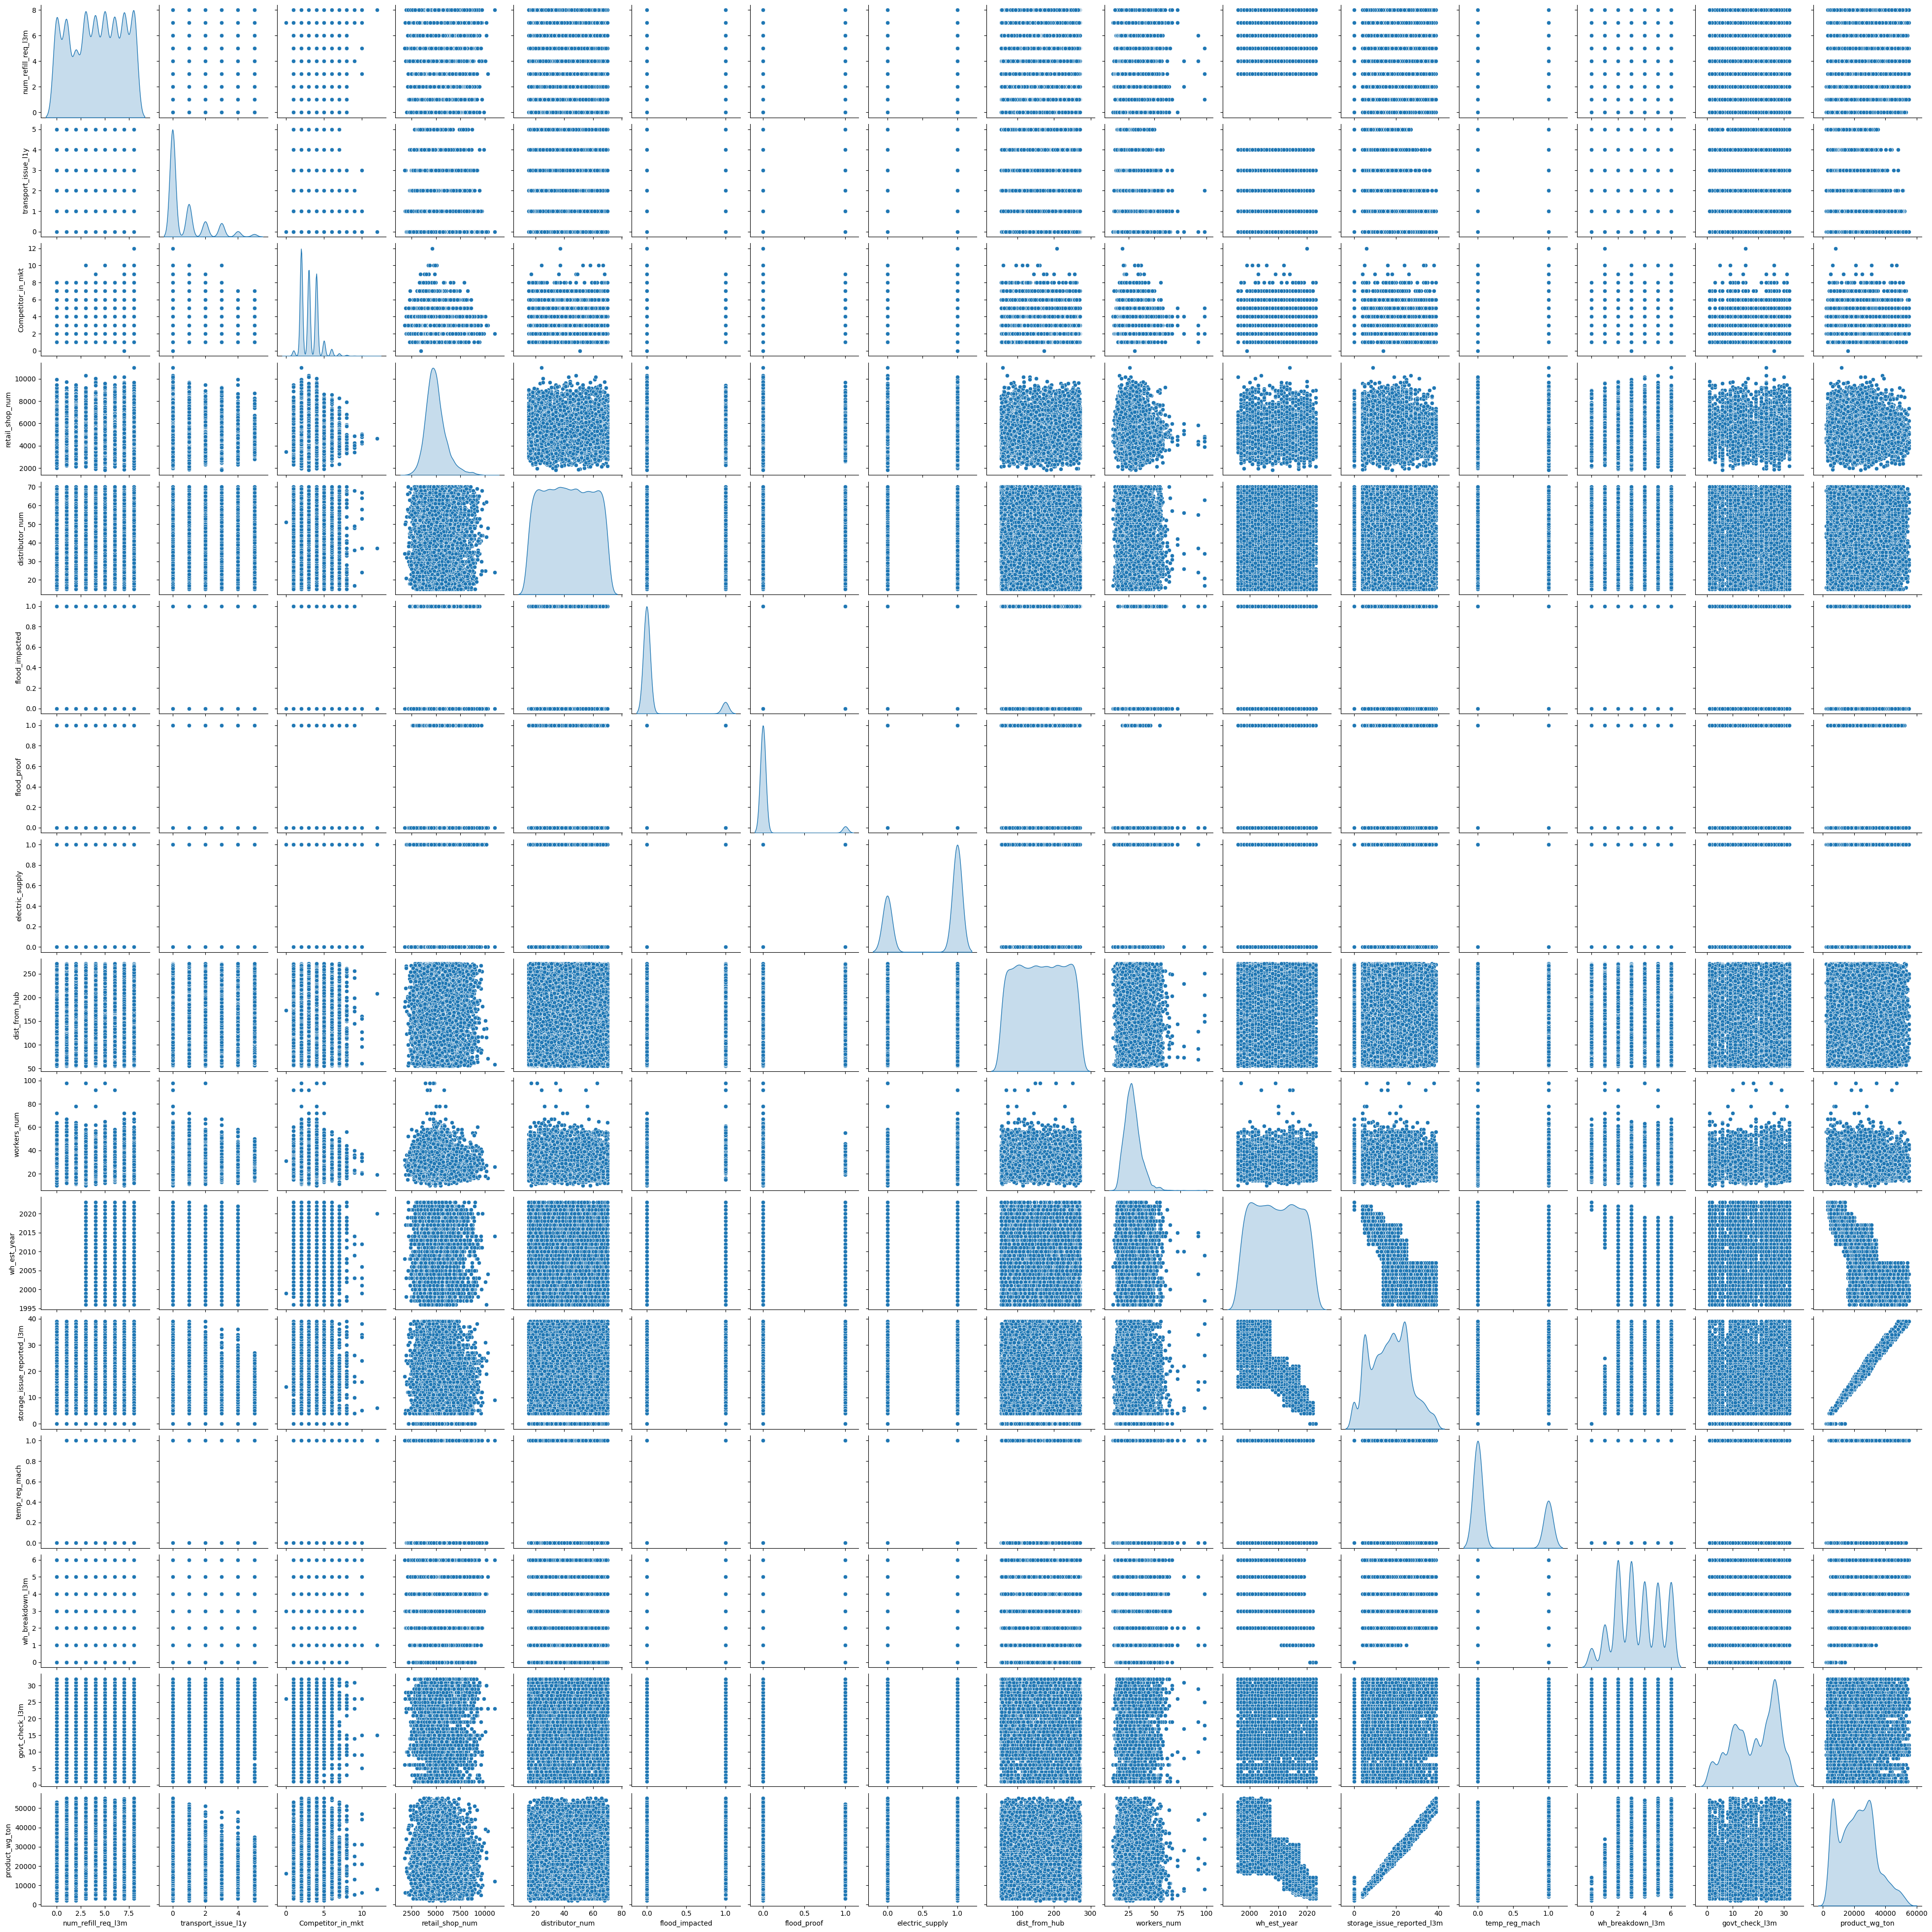

In [206]:
#multivariate analysis in train data
sns.pairplot(train_data,diag_kind='kde')
plt.show()

##**Checking null values and handling using imputation method**

In [207]:
#checking null values of training data
print("null values:\n",train_data.isnull().sum())

null values:
 Location_type                      0
WH_capacity_size                   0
zone                               0
WH_regional_zone                   0
num_refill_req_l3m                 0
transport_issue_l1y                0
Competitor_in_mkt                  0
retail_shop_num                    0
wh_owner_type                      0
distributor_num                    0
flood_impacted                     0
flood_proof                        0
electric_supply                    0
dist_from_hub                      0
workers_num                      667
wh_est_year                     7860
storage_issue_reported_l3m         0
temp_reg_mach                      0
approved_wh_govt_certificate     599
wh_breakdown_l3m                   0
govt_check_l3m                     0
product_wg_ton                     0
dtype: int64


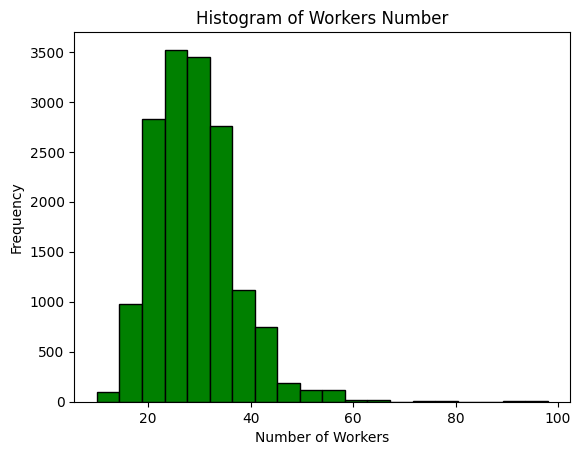

Skewness: 1.0718477078797888
Skewness: 0.015675892058875558


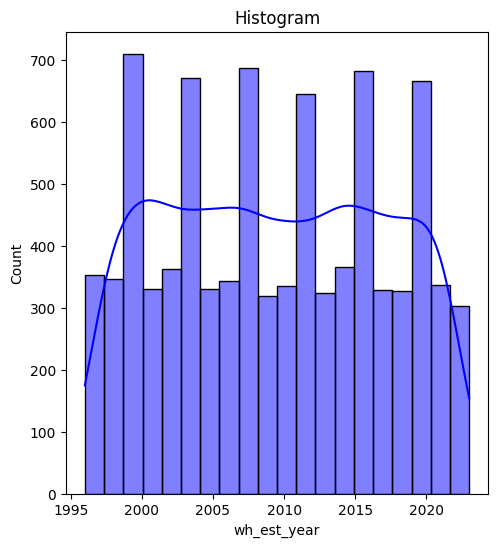

In [208]:
#Handling missing values of training data
workers_num = train_data['workers_num']
plt.hist(workers_num, bins=20, color='green',edgecolor='black')
plt.xlabel('Number of Workers')
plt.ylabel('Frequency')
plt.title('Histogram of Workers Number')
plt.show()

# Computing skewness
skewness = skew(train_data['workers_num'].dropna())
print(f'Skewness: {skewness}')

wh_est_year = train_data['wh_est_year']
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(wh_est_year, bins=20, kde=True, color='blue', edgecolor='black')
plt.title('Histogram')

# Computing skewness
skewness = skew(train_data['wh_est_year'].dropna())
print(f'Skewness: {skewness}')

In [210]:
# Fill missing values in 'workers_num' with the median value. Because skewness value of 1.07, the distribution is positively skewed.Median imputation is generally more robust to outliers and works well for variables with skewed distributions.
train_data['workers_num'].fillna(train_data['workers_num'].median(), inplace=True)

#Fill missing values in 'wh_est_year' with the median value.Because skewness value 0.02 indicates slight positive skewness.Since skewness is very close to zero, we can choose between mean and median imputation.
train_data['wh_est_year'].fillna(train_data['wh_est_year'].median(), inplace=True)

#Fill missing values in 'approved_wh_govt_certificate' with the mode value.Because approved_wh_govt_certificate is categorical variable.
train_data['approved_wh_govt_certificate'].fillna(train_data['approved_wh_govt_certificate'].mode()[0],inplace=True)

print("null values of train data after handling :\n",train_data.isnull().sum())

null values of train data after handling :
 Location_type                   0
WH_capacity_size                0
zone                            0
WH_regional_zone                0
num_refill_req_l3m              0
transport_issue_l1y             0
Competitor_in_mkt               0
retail_shop_num                 0
wh_owner_type                   0
distributor_num                 0
flood_impacted                  0
flood_proof                     0
electric_supply                 0
dist_from_hub                   0
workers_num                     0
wh_est_year                     0
storage_issue_reported_l3m      0
temp_reg_mach                   0
approved_wh_govt_certificate    0
wh_breakdown_l3m                0
govt_check_l3m                  0
product_wg_ton                  0
dtype: int64


In [211]:
#checking null values of testing data
print("null values:\n",test_data.isnull().sum())

null values:
 Location_type                      0
WH_capacity_size                   0
zone                               0
WH_regional_zone                   0
num_refill_req_l3m                 0
transport_issue_l1y                0
Competitor_in_mkt                  0
retail_shop_num                    0
wh_owner_type                      0
distributor_num                    0
flood_impacted                     0
flood_proof                        0
electric_supply                    0
dist_from_hub                      0
workers_num                      210
wh_est_year                     2685
storage_issue_reported_l3m         0
temp_reg_mach                      0
approved_wh_govt_certificate     206
wh_breakdown_l3m                   0
govt_check_l3m                     0
product_wg_ton                     0
dtype: int64


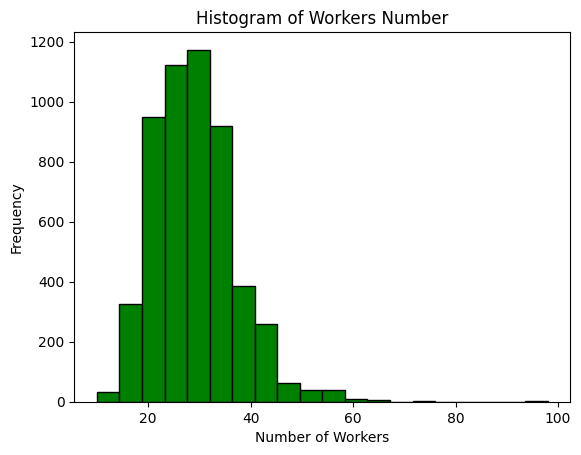

Skewness: 0.954597134516908
Skewness: -0.0169240620938015


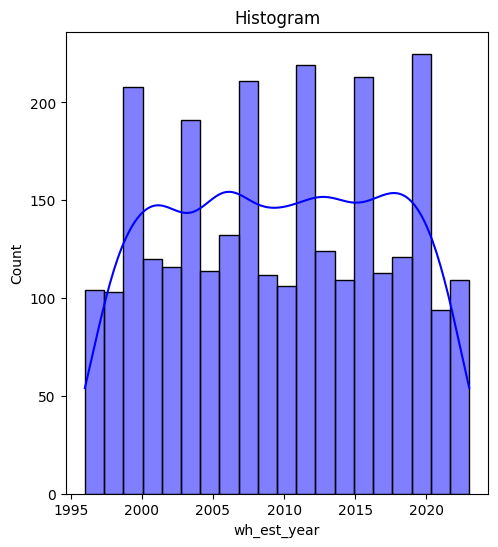

In [212]:
#Handling missing values of testing data
workers_num = test_data['workers_num']
plt.hist(workers_num, bins=20, color='green',edgecolor='black')
plt.xlabel('Number of Workers')
plt.ylabel('Frequency')
plt.title('Histogram of Workers Number')
plt.show()

# Computing skewness
skewness = skew(test_data['workers_num'].dropna())
print(f'Skewness: {skewness}')

wh_est_year = test_data['wh_est_year']
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(wh_est_year, bins=20, kde=True, color='blue', edgecolor='black')
plt.title('Histogram')

# Computing skewness
skewness = skew(test_data['wh_est_year'].dropna())
print(f'Skewness: {skewness}')

In [213]:
# Fill missing values in 'workers_num' with the median value. Because skewness value of 0.95, the distribution is positively skewed.The median is less sensitive to extreme values and may be a better choice when dealing with skewed data.
test_data['workers_num'].fillna(test_data['workers_num'].median(), inplace=True)

#Fill missing values in 'wh_est_year' with the mean value.Because skewness value -0.01 is close to zero and the distribution is considered nearly normal.since the data is not heavily skewed in either direction we can use mean imputation.
test_data['wh_est_year'].fillna(test_data['wh_est_year'].mean(), inplace=True)

#Fill missing values in 'approved_wh_govt_certificate' with the mode value.Because approved_wh_govt_certificate is categorical variable.
test_data['approved_wh_govt_certificate'].fillna(test_data['approved_wh_govt_certificate'].mode()[0],inplace=True)

print("null values of test data after handling :\n",test_data.isnull().sum())

null values of test data after handling :
 Location_type                   0
WH_capacity_size                0
zone                            0
WH_regional_zone                0
num_refill_req_l3m              0
transport_issue_l1y             0
Competitor_in_mkt               0
retail_shop_num                 0
wh_owner_type                   0
distributor_num                 0
flood_impacted                  0
flood_proof                     0
electric_supply                 0
dist_from_hub                   0
workers_num                     0
wh_est_year                     0
storage_issue_reported_l3m      0
temp_reg_mach                   0
approved_wh_govt_certificate    0
wh_breakdown_l3m                0
govt_check_l3m                  0
product_wg_ton                  0
dtype: int64


##**Outlier treatment**

In [214]:
train_data_1 = pd.DataFrame(train_data, columns = ['num_refill_req_l3m','transport_issue_l1y','Competitor_in_mkt','retail_shop_num','distributor_num','dist_from_hub','workers_num','storage_issue_reported_l3m','wh_breakdown_l3m','govt_check_l3m','product_wg_ton'])

In [215]:
#identifying outliers in train data
cols = ['Competitor_in_mkt','retail_shop_num','workers_num']
def handle_outliers_iqr(data, column):
    # Calculate the first and third quartiles (Q1 and Q3)
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)

    # Calculate the interquartile range (IQR)
    IQR = Q3 - Q1

    # Define the upper and lower bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

     # Replace outliers with the upper or lower bound
    data[column] = np.where(data[column] < lower_bound, lower_bound, data[column])
    data[column] = np.where(data[column] > upper_bound, upper_bound, data[column])


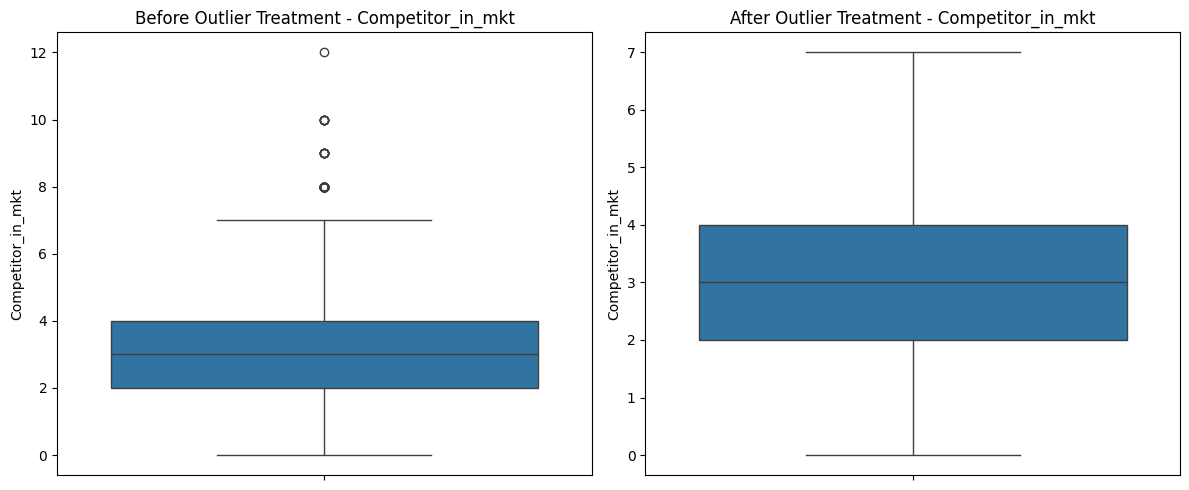

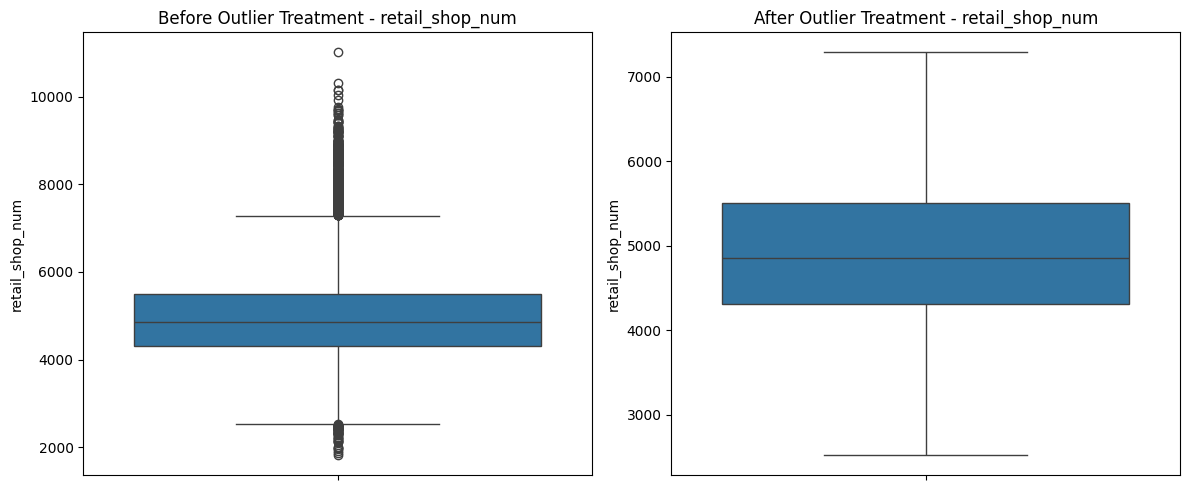

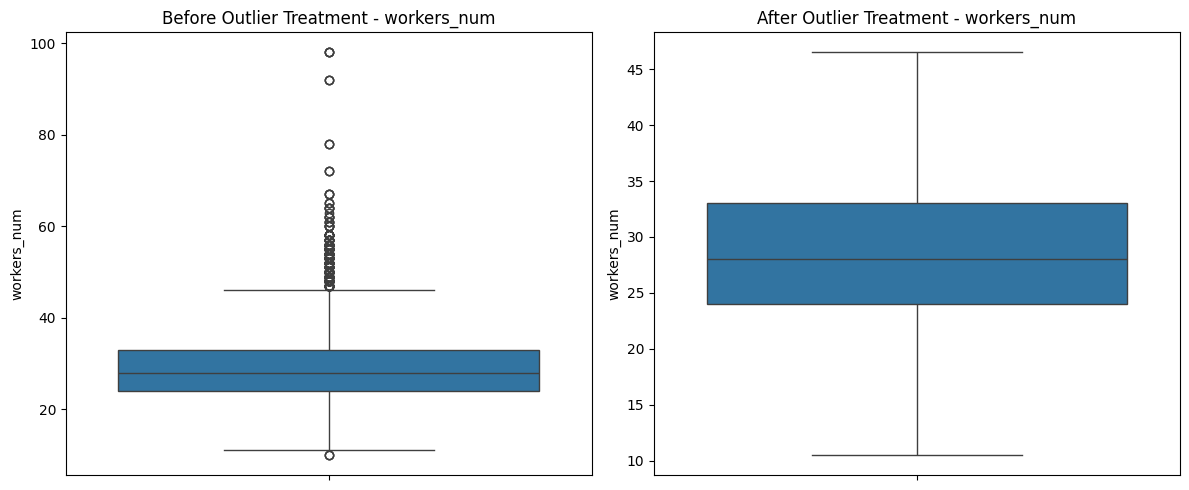

After handling outliers:
       Competitor_in_mkt  retail_shop_num   workers_num
count       16620.000000     16620.000000  16620.000000
mean            3.098075      4956.732521     28.708995
std             1.126356       967.091419      7.115697
min             0.000000      2522.500000     10.500000
25%             2.000000      4309.000000     24.000000
50%             3.000000      4856.000000     28.000000
75%             4.000000      5500.000000     33.000000
max             7.000000      7286.500000     46.500000


In [216]:
# Apply the outlier treatment to specified columns
for column in cols:
     # Create a 1x3 subplot grid for each column
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # Display boxplot before outlier treatment
    sns.boxplot(train_data_1[column], ax=axes[0])
    axes[0].set_title(f'Before Outlier Treatment - {column}')

    # Handle outliers using the defined function
    handle_outliers_iqr(train_data_1, column)

    # Display boxplot after outlier treatment
    sns.boxplot(train_data_1[column], ax=axes[1])
    axes[1].set_title(f'After Outlier Treatment - {column}')

    # Adjust layout for better visibility
    plt.tight_layout()
    plt.show()

# Verify the changes
print("After handling outliers:")
print(train_data_1[cols].describe())

In [217]:
test_data_1 = pd.DataFrame(test_data, columns = ['num_refill_req_l3m','transport_issue_l1y','Competitor_in_mkt','retail_shop_num','distributor_num','dist_from_hub','workers_num','storage_issue_reported_l3m','wh_breakdown_l3m','govt_check_l3m','product_wg_ton'])

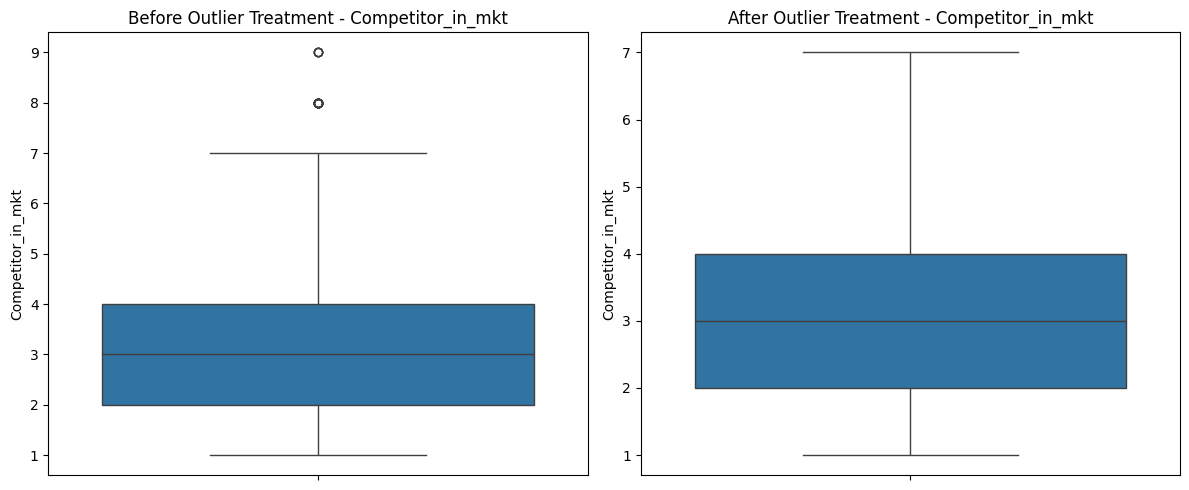

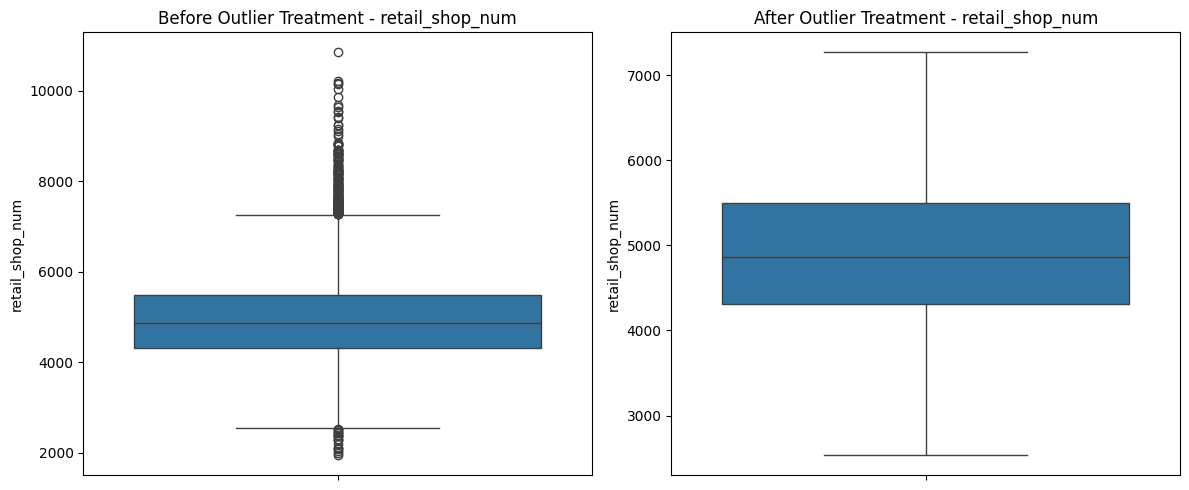

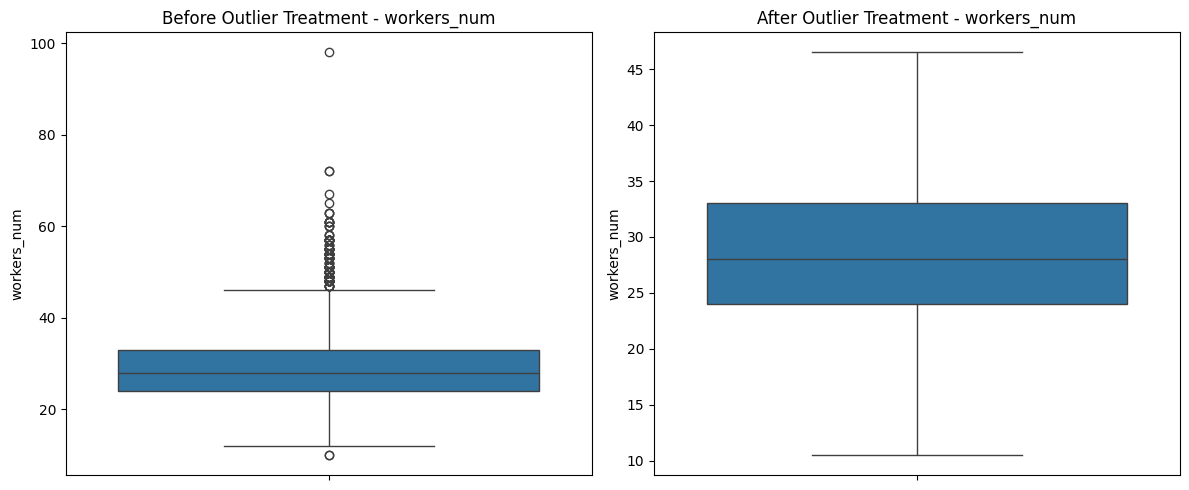

After handling outliers in test data:
       Competitor_in_mkt  retail_shop_num  workers_num
count        5529.000000      5529.000000  5529.000000
mean            3.101284      4955.794719    28.805390
std             1.108551       970.756543     7.162246
min             1.000000      2537.000000    10.500000
25%             2.000000      4310.000000    24.000000
50%             3.000000      4863.000000    28.000000
75%             4.000000      5492.000000    33.000000
max             7.000000      7265.000000    46.500000


In [218]:
# Apply the outlier treatment to specified columns in test data
for column in cols:
    # Create a 1x3 subplot grid for each column
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # Display boxplot before outlier treatment in test data
    sns.boxplot(test_data_1[column], ax=axes[0])
    axes[0].set_title(f'Before Outlier Treatment - {column}')

    # Handle outliers using the defined function
    handle_outliers_iqr(test_data_1, column)

    # Display boxplot after outlier treatment in test data
    sns.boxplot(test_data_1[column], ax=axes[1])
    axes[1].set_title(f'After Outlier Treatment - {column}')

    # Adjust layout for better visibility
    plt.tight_layout()
    plt.show()

# Verify the changes in test data
print("After handling outliers in test data:")
print(test_data_1[cols].describe())

##**One-Hot Encoding for Categorical Feature Transformation**

In [219]:
#Apply one-hot encoding to training data
encoded_training_data=pd.get_dummies(train_data,columns=['Location_type', 'WH_capacity_size', 'zone','WH_regional_zone','wh_owner_type','approved_wh_govt_certificate'],drop_first=True)
encoded_training_data.head()

num_refill_req_l3m  transport_issue_l1y  Competitor_in_mkt  \
0                   3                    1                  2   
1                   0                    0                  4   
2                   1                    0                  4   
3                   7                    4                  2   
4                   3                    1                  2   

   retail_shop_num  distributor_num  flood_impacted  flood_proof  \
0             4651               24               0            1   
1             6217               47               0            0   
2             4306               64               0            0   
3             6000               50               0            0   
4             4740               42               1            0   

   electric_supply  dist_from_hub  workers_num  ...  WH_regional_zone_Zone 2  \
0                1             91         29.0  ...                        0   
1                1            210         31.0  ...                        0   
2                0            161         37.0  ...                        1   
3                0            103         21.0  ...                        0   
4                1            112         25.0  ...                        0   

   WH_regional_zone_Zone 3  WH_regional_zone_Zone 4  WH_regional_zone_Zone 5  \
0                        0                        0                        0   
1                        0                        0                        1   
2                        0                        0                        0   
3                        1                        0                        0   
4                        0                        0                        1   

   WH_regional_zone_Zone 6  wh_owner_type_Rented  \
0                        1                     1   
1                        0                     0   
2                        0                     0   
3                        0                     1   
4                        0                     0   

   approved_wh_govt_certificate_A+  approved_wh_govt_certificate_B  \
0                                0                               0   
1                                0                               0   
2                                0                               0   
3                                1                               0   
4                                0                               0   

   approved_wh_govt_certificate_B+  approved_wh_govt_certificate_C  
0                                0                               0  
1                                0                               0  
2                                0                               0  
3                                0                               0  
4                                0                               1  

[5 rows x 32 columns]

In [220]:
#Apply one-hot encoding to test data
encoded_testing_data=pd.get_dummies(test_data,columns=['Location_type', 'WH_capacity_size', 'zone','WH_regional_zone','wh_owner_type','approved_wh_govt_certificate'],drop_first=True)
encoded_testing_data.head()

num_refill_req_l3m  transport_issue_l1y  Competitor_in_mkt  \
16621                   5                    0                  3   
16622                   5                    0                  2   
16623                   3                    0                  3   
16624                   5                    2                  2   
16625                   6                    0                  4   

       retail_shop_num  distributor_num  flood_impacted  flood_proof  \
16621             5590               15               0            0   
16622             5856               40               0            0   
16623             4803               40               0            0   
16624             4784               15               0            0   
16625             3699               24               0            0   

       electric_supply  dist_from_hub  workers_num  ...  \
16621                0            156         30.0  ...   
16622                1             79         31.0  ...   
16623                1             70         41.0  ...   
16624                1            255         33.0  ...   
16625                0            205         20.0  ...   

       WH_regional_zone_Zone 2  WH_regional_zone_Zone 3  \
16621                        0                        0   
16622                        0                        0   
16623                        0                        0   
16624                        0                        0   
16625                        0                        0   

       WH_regional_zone_Zone 4  WH_regional_zone_Zone 5  \
16621                        0                        1   
16622                        0                        1   
16623                        0                        0   
16624                        1                        0   
16625                        1                        0   

       WH_regional_zone_Zone 6  wh_owner_type_Rented  \
16621                        0                     0   
16622                        0                     0   
16623                        1                     1   
16624                        0                     1   
16625                        0                     1   

       approved_wh_govt_certificate_A+  approved_wh_govt_certificate_B  \
16621                                0                               0   
16622                                0                               0   
16623                                1                               0   
16624                                1                               0   
16625                                0                               1   

       approved_wh_govt_certificate_B+  approved_wh_govt_certificate_C  
16621                                0                               0  
16622                                0                               1  
16623                                0                               0  
16624                                0                               0  
16625                                0                               0  

[5 rows x 32 columns]

In [221]:
print("Missing values in encoded training data:")
print(encoded_training_data.isnull().sum())
print("Missing values in encoded testing data:")
print(encoded_testing_data.isnull().sum())

Missing values in encoded training data:
num_refill_req_l3m                 0
transport_issue_l1y                0
Competitor_in_mkt                  0
retail_shop_num                    0
distributor_num                    0
flood_impacted                     0
flood_proof                        0
electric_supply                    0
dist_from_hub                      0
workers_num                        0
wh_est_year                        0
storage_issue_reported_l3m         0
temp_reg_mach                      0
wh_breakdown_l3m                   0
govt_check_l3m                     0
product_wg_ton                     0
Location_type_Urban                0
WH_capacity_size_Mid               0
WH_capacity_size_Small             0
zone_North                         0
zone_South                         0
zone_West                          0
WH_regional_zone_Zone 2            0
WH_regional_zone_Zone 3            0
WH_regional_zone_Zone 4            0
WH_regional_zone_Zone 5           

##**Machine learning model and evaluation**

In [222]:
X_train=encoded_training_data.drop(['product_wg_ton'],axis=1)
X_test=encoded_testing_data.drop(['product_wg_ton'],axis=1)

In [223]:
Y_train=encoded_training_data.product_wg_ton
Y_test=encoded_testing_data.product_wg_ton

Linear Regression:
Mean Squared Error: 1898087.5712890394
Root Mean Squared Error: 1377.7109897540338
Mean Absolute Error: 1009.3006087241112
R-squared Score: 0.9860021693780132

Lasso Regression:
Mean Squared Error: 1898231.7549843474
Root Mean Squared Error: 1377.763316025052
Mean Absolute Error: 1008.4860084825737
R-squared Score: 0.9860011060661956

Ridge Regression:
Mean Squared Error: 1898074.4771680676
Root Mean Squared Error: 1377.706237616738
Mean Absolute Error: 1009.2582942233516
R-squared Score: 0.9860022659432561


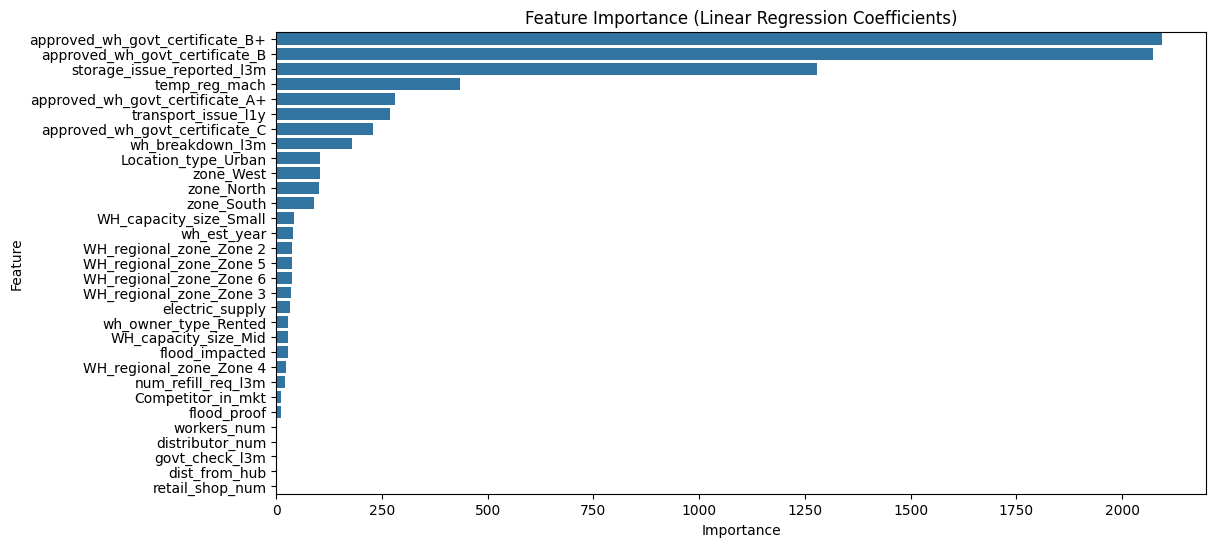

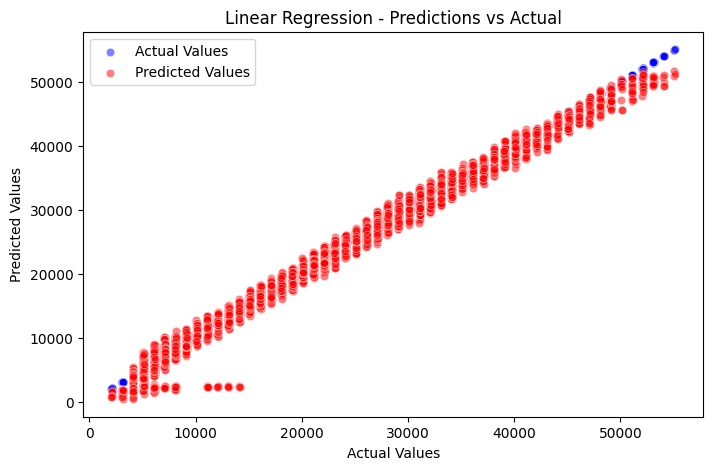

In [224]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

#Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, Y_train)
Y_linear_pred = linear_model.predict(X_test)

# Lasso Regression
lasso_model = Lasso()
lasso_model.fit(X_train, Y_train)
Y_lasso_pred = lasso_model.predict(X_test)

# Ridge Regression
ridge_model = Ridge()
ridge_model.fit(X_train, Y_train)
Y_ridge_pred = ridge_model.predict(X_test)

# Metrics for Linear Regression
linear_mse = mean_squared_error(Y_test, Y_linear_pred)
linear_rmse = np.sqrt(linear_mse)
linear_mae = mean_absolute_error(Y_test, Y_linear_pred)
linear_r2 = r2_score(Y_test, Y_linear_pred)

print("Linear Regression:")
print(f"Mean Squared Error: {linear_mse}")
print(f"Root Mean Squared Error: {linear_rmse}")
print(f"Mean Absolute Error: {linear_mae}")
print(f"R-squared Score: {linear_r2}")

# Metrics for Lasso Regression
lasso_mse = mean_squared_error(Y_test, Y_lasso_pred)
lasso_rmse = np.sqrt(lasso_mse)
lasso_mae = mean_absolute_error(Y_test, Y_lasso_pred)
lasso_r2 = r2_score(Y_test, Y_lasso_pred)

print("\nLasso Regression:")
print(f"Mean Squared Error: {lasso_mse}")
print(f"Root Mean Squared Error: {lasso_rmse}")
print(f"Mean Absolute Error: {lasso_mae}")
print(f"R-squared Score: {lasso_r2}")

# Metrics for Ridge Regression
ridge_mse = mean_squared_error(Y_test, Y_ridge_pred)
ridge_rmse = np.sqrt(ridge_mse)
ridge_mae = mean_absolute_error(Y_test, Y_ridge_pred)
ridge_r2 = r2_score(Y_test, Y_ridge_pred)

print("\nRidge Regression:")
print(f"Mean Squared Error: {ridge_mse}")
print(f"Root Mean Squared Error: {ridge_rmse}")
print(f"Mean Absolute Error: {ridge_mae}")
print(f"R-squared Score: {ridge_r2}")

# Get coefficients from the trained model
coefficients = model.coef_

# Create a DataFrame for feature importance
feature_importance = pd.DataFrame({'Feature': X_train.columns, 'Importance': np.abs(coefficients)})

# Sort feature importance by absolute value
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Visualize feature importance
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance (Linear Regression Coefficients)')
plt.show()

# Visualize predictions vs. actual values for Linear Regression
plt.figure(figsize=(8, 5))
# Plotting actual values
sns.scatterplot(x=Y_test, y=Y_test, label='Actual Values', color='blue', alpha=0.5)
# Plotting predicted values
sns.scatterplot(x=Y_test, y=Y_linear_pred, label='Predicted Values', color='red', alpha=0.5)
plt.title('Linear Regression - Predictions vs Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

Random Forest:
Mean Squared Error: 817833.199115916
Root Mean Squared Error: 904.3413067619526
Mean Absolute Error: 677.1698227527583
R-squared Score: 0.9939687236925072


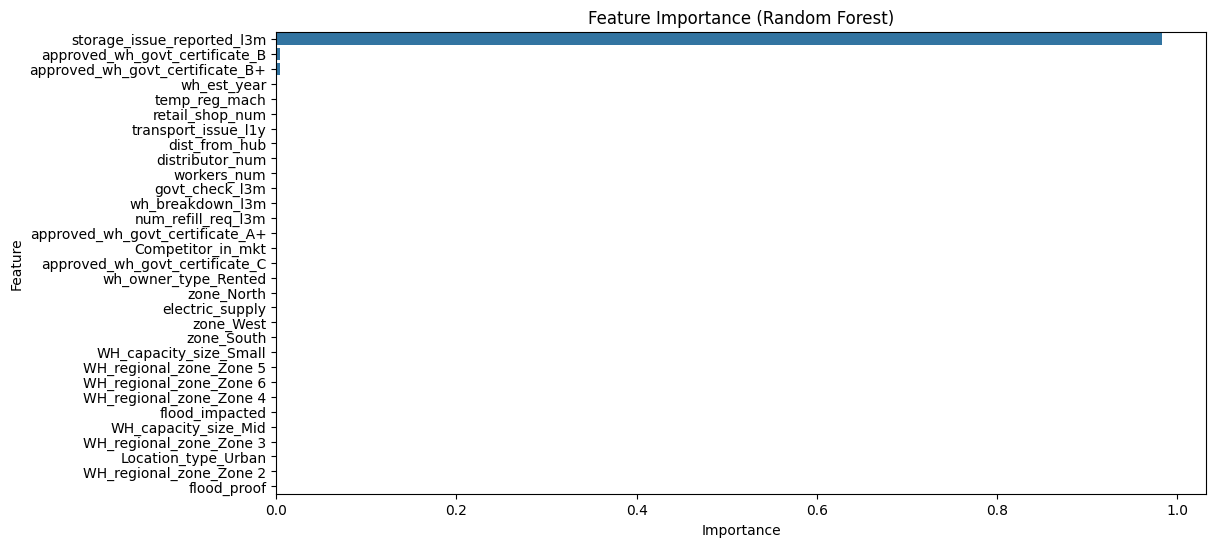

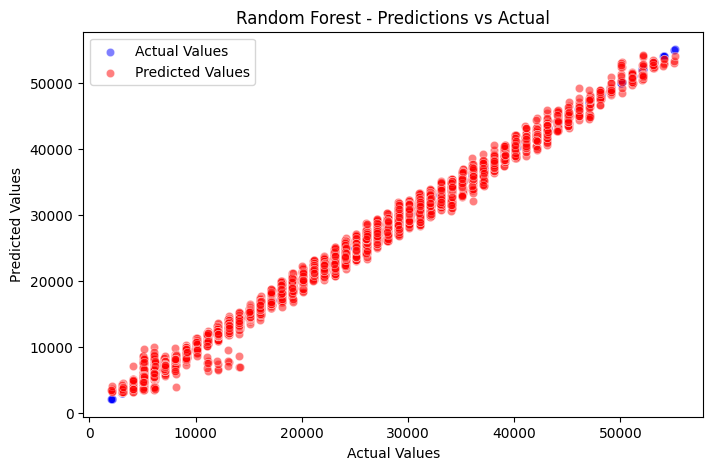

In [225]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor
rf_model=RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, Y_train)
Y_rf_pred = rf_model.predict(X_test)

# Metrics for Random Forest
rf_mse = mean_squared_error(Y_test, Y_rf_pred)
rf_rmse = np.sqrt(rf_mse)
rf_mae = mean_absolute_error(Y_test, Y_rf_pred)
rf_r2 = r2_score(Y_test, Y_rf_pred)

print("Random Forest:")
print(f"Mean Squared Error: {rf_mse}")
print(f"Root Mean Squared Error: {rf_rmse}")
print(f"Mean Absolute Error: {rf_mae}")
print(f"R-squared Score: {rf_r2}")

# Get feature importances from the trained model
feature_importance = rf_model.feature_importances_

# Create a DataFrame for feature importance
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance})

# Sort the features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Visualize feature importance
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance (Random Forest)')
plt.show()

# Visualize predictions vs. actual values for Random Forest
plt.figure(figsize=(8, 5))
# Plotting actual values
sns.scatterplot(x=Y_test, y=Y_test, label='Actual Values', color='blue', alpha=0.5)
# Plotting predicted values
sns.scatterplot(x=Y_test, y=Y_rf_pred, label='Predicted Values', color='red', alpha=0.5)
plt.title('Random Forest - Predictions vs Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

Decision Tree:
Mean Squared Error: 1585087.7046482186
Root Mean Squared Error: 1259.0026626851186
Mean Absolute Error: 852.1394465545307
R-squared Score: 0.9883104501887701


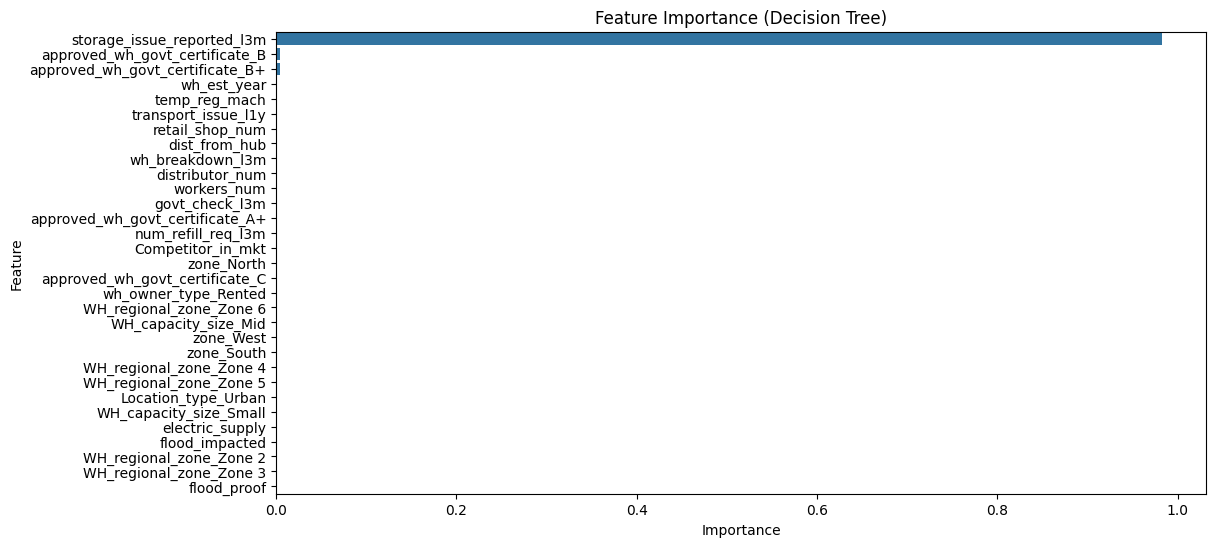

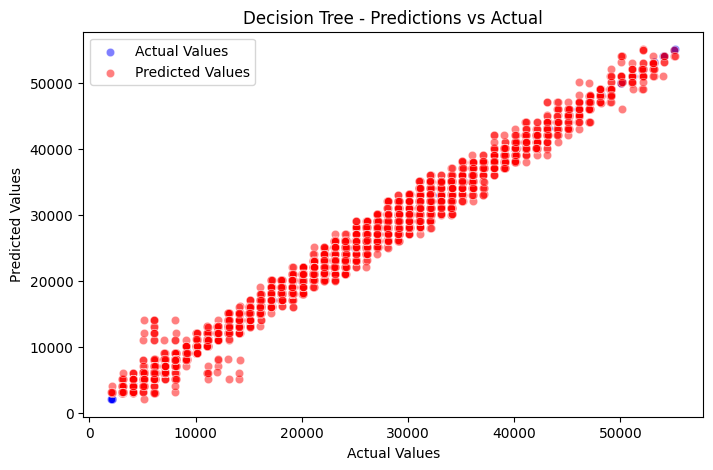

In [227]:
# Decision Tree
from sklearn.tree import DecisionTreeRegressor
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, Y_train)
Y_dt_pred = dt_model.predict(X_test)

# Metrics for Decision Tree
dt_mse = mean_squared_error(Y_test, Y_dt_pred)
dt_rmse = np.sqrt(dt_mse)
dt_mae = mean_absolute_error(Y_test, Y_dt_pred)
dt_r2 = r2_score(Y_test, Y_dt_pred)

print("Decision Tree:")
print(f"Mean Squared Error: {dt_mse}")
print(f"Root Mean Squared Error: {dt_rmse}")
print(f"Mean Absolute Error: {dt_mae}")
print(f"R-squared Score: {dt_r2}")

feature_importance = dt_model.feature_importances_

# Create a DataFrame for feature importance
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance})

# Sort the features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Visualize feature importance
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance (Decision Tree)')
plt.show()

# Visualize predictions vs. actual values for Decision Tree
plt.figure(figsize=(8, 5))
# Plotting actual values
sns.scatterplot(x=Y_test, y=Y_test, label='Actual Values', color='blue', alpha=0.5)
# Plotting predicted values
sns.scatterplot(x=Y_test, y=Y_dt_pred, label='Predicted Values', color='red', alpha=0.5)
plt.title('Decision Tree - Predictions vs Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

Gradient Boosting:
Mean Squared Error: 826601.6660586811
Root Mean Squared Error: 909.1763668610624
Mean Absolute Error: 697.150835376504
R-squared Score: 0.9939040588598957


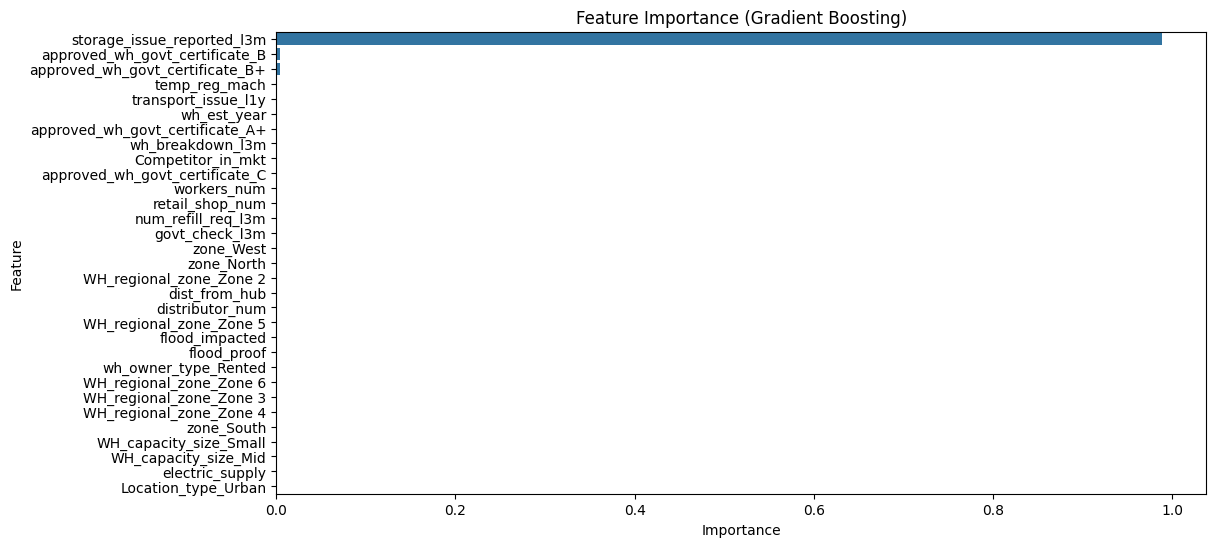

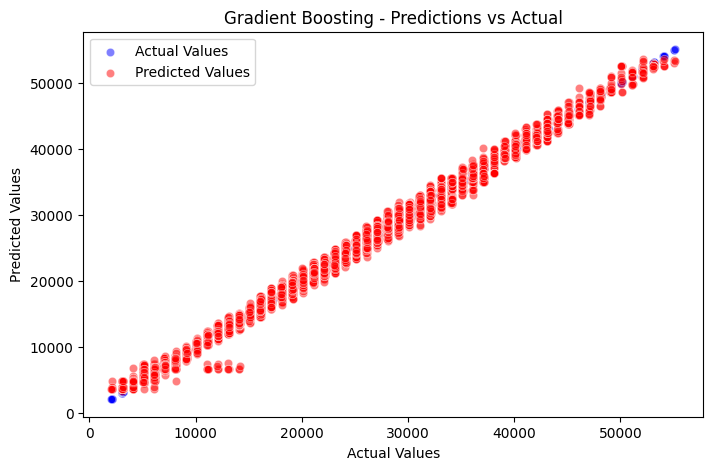

In [228]:
from sklearn.ensemble import GradientBoostingRegressor
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, Y_train)
Y_gb_pred = gb_model.predict(X_test)

# Metrics for Gradient Boosting
gb_mse = mean_squared_error(Y_test, Y_gb_pred)
gb_rmse = np.sqrt(gb_mse)
gb_mae = mean_absolute_error(Y_test, Y_gb_pred)
gb_r2 = r2_score(Y_test, Y_gb_pred)

print("Gradient Boosting:")
print(f"Mean Squared Error: {gb_mse}")
print(f"Root Mean Squared Error: {gb_rmse}")
print(f"Mean Absolute Error: {gb_mae}")
print(f"R-squared Score: {gb_r2}")

# Get feature importances from the trained model
feature_importance = gb_model.feature_importances_

# Create a DataFrame for feature importance
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance})

# Sort the features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Visualize feature importance
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance (Gradient Boosting)')
plt.show()

# Visualize predictions vs. actual values for Gradient Boosting
plt.figure(figsize=(8, 5))
# Plotting actual values
sns.scatterplot(x=Y_test, y=Y_test, label='Actual Values', color='blue', alpha=0.5)
# Plotting predicted values
sns.scatterplot(x=Y_test, y=Y_gb_pred, label='Predicted Values', color='red', alpha=0.5)
plt.title('Gradient Boosting - Predictions vs Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

Support Vector Regressor:
Mean Squared Error: 131094355.33104011
Root Mean Squared Error: 11449.644332076003
Mean Absolute Error: 9447.45506212542
R-squared Score: 0.03321816696990898


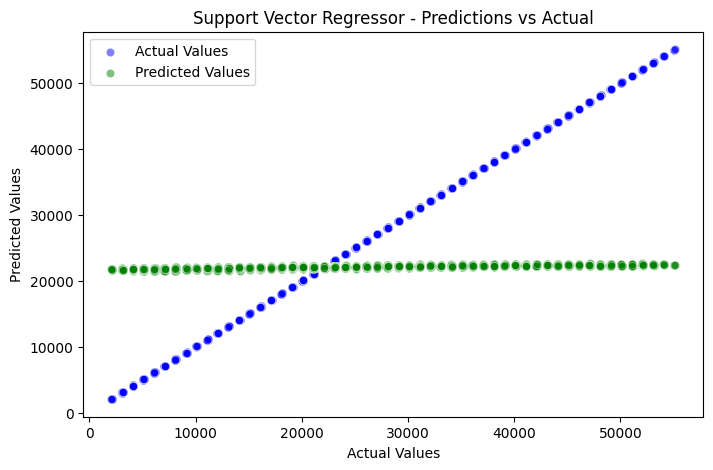

In [229]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create SVR model
svr_model = SVR()
svr_model.fit(X_train_scaled, Y_train)

# Predict using the SVR model
Y_svr_pred = svr_model.predict(X_test_scaled)

# Metrics for SVR
svr_mse = mean_squared_error(Y_test, Y_svr_pred)
svr_rmse = np.sqrt(svr_mse)
svr_mae = mean_absolute_error(Y_test, Y_svr_pred)
svr_r2 = r2_score(Y_test, Y_svr_pred)

print("Support Vector Regressor:")
print(f"Mean Squared Error: {svr_mse}")
print(f"Root Mean Squared Error: {svr_rmse}")
print(f"Mean Absolute Error: {svr_mae}")
print(f"R-squared Score: {svr_r2}")

# Visualize predictions vs. actual values for SVR
plt.figure(figsize=(8, 5))
# Plotting actual values
sns.scatterplot(x=Y_test, y=Y_test, label='Actual Values', color='blue', alpha=0.5)
# Plotting predicted values
sns.scatterplot(x=Y_test, y=Y_svr_pred, label='Predicted Values', color='green', alpha=0.5)
plt.title('Support Vector Regressor - Predictions vs Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

K-Nearest Neighbors:
Mean Squared Error: 56190792.178332426
Root Mean Squared Error: 7496.051772655551
Mean Absolute Error: 5881.047639717851
R-squared Score: 0.5856096402899935


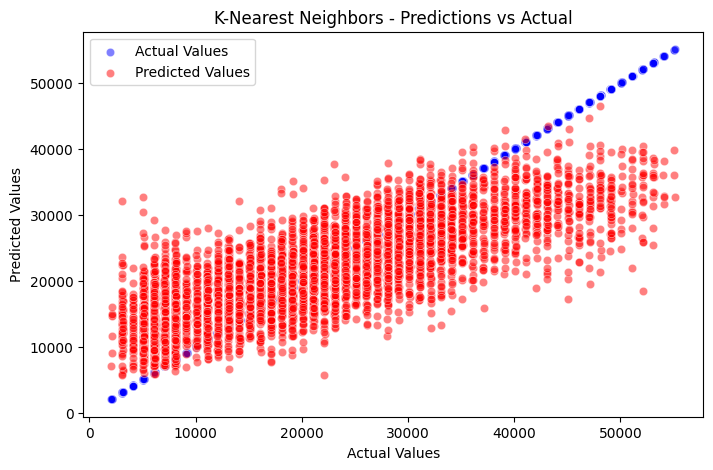

In [230]:
from sklearn.neighbors import KNeighborsRegressor
# Instantiate the KNN Regressor model
knn_model = KNeighborsRegressor(n_neighbors=5)  # You can adjust the number of neighbors (k) as needed

# Train the model
knn_model.fit(X_train, Y_train)

# Predictions on the test set
Y_knn_pred = knn_model.predict(X_test)

# Metrics for KNN
knn_mse = mean_squared_error(Y_test, Y_knn_pred)
knn_rmse = np.sqrt(knn_mse)
knn_mae = mean_absolute_error(Y_test, Y_knn_pred)
knn_r2 = r2_score(Y_test, Y_knn_pred)

print("K-Nearest Neighbors:")
print(f"Mean Squared Error: {knn_mse}")
print(f"Root Mean Squared Error: {knn_rmse}")
print(f"Mean Absolute Error: {knn_mae}")
print(f"R-squared Score: {knn_r2}")

# Visualize predictions vs. actual values for KNN
plt.figure(figsize=(8, 5))
# Plotting actual values
sns.scatterplot(x=Y_test, y=Y_test, label='Actual Values', color='blue', alpha=0.5)
# Plotting predicted values
sns.scatterplot(x=Y_test, y=Y_knn_pred, label='Predicted Values', color='red', alpha=0.5)
plt.title('K-Nearest Neighbors - Predictions vs Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

##**Conclusion**

After evaluating six machine learning algorithms on the provided dataset, Random Forest and Gradient Boosting emerged as the top-performing models based on key metrics:

1)Random Forest:

Mean Squared Error (MSE): 817833.20

Root Mean Squared Error (RMSE): 904.34

Mean Absolute Error (MAE): 677.17

R-squared Score: 0.99397

2)Gradient Boosting:

Mean Squared Error (MSE): 826601.67

Root Mean Squared Error (RMSE): 909.18

Mean Absolute Error (MAE): 697.15

R-squared Score: 0.99390

These algorithms demonstrated superior predictive accuracy, with lower MSE, RMSE, and MAE values, and higher R-squared scores compared to other models such as Linear Regression, Lasso Regression, Ridge Regression, Decision Tree, and K-Nearest Neighbors